In [1]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

In [2]:
pl.style.use('fabiostyle')
# needs to find the library of functions
sys.path.append('../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [3]:
# %%javascript
# var nb = IPython.notebook;
# var kernel = IPython.notebook.kernel;
# var command = "NOTEBOOK_NAME = '" + nb.base_url + nb.notebook_path + "'";
# kernel.execute(command);

In [4]:
# NOTEBOOK_NAME = NOTEBOOK_NAME.split('/')[-1][:-6]
NOTEBOOK_NAME = 'decoding_around_onset_combined_vhpc_wBs'

In [5]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

Unable to restore variable 'add_significance', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'combine_train_test_patterns_across_tbs', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'combine_train_test_patterns_b', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'do_test_across_tbs', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'do_test_cross', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'do_test_cross_distinct', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'do_test_within', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'do_test_wi

In [6]:
from itertools import product
def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing'):
    all_of_them = {}
    for ani in animal_list:
        folder = '../%s/notebooks/autorestore/%s/' % (ani, notebook)
        all_of_them.update({ani: ut.load_variable(varname, folder)})
    return all_of_them

In [7]:
#all_animals =  'c3f3','c3f2','c3m1', 'c3m2', 'c4m3',         'c10m8', '90', '91', '92','93'
#expo_animals = 'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'
#pre_animals =  'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'
#post_animals = 'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'
#renew_animals ='c3f3','c3f2','c3m1', 'c3m2', 'c4m3',         'c10m8', '90', '91', '92','93'
#ext2_animals = 'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'
#ext1_animals = 'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'

all_animals  = np.loadtxt('../allmice.txt', dtype=str)
expo_animals = np.loadtxt('../expo_mice.txt', dtype=str)
pre_animals  = np.loadtxt('../pre_mice.txt', dtype=str)
d2_animals =  'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'
post_animals = np.loadtxt('../post_mice.txt', dtype=str)
renew_animals ='c3f3','c3f2','c3m1', 'c3m2', 'c4m3',         'c10m8', '90', '91', '92','93','91b','92b','93b'
ext2_animals = np.loadtxt('../ext2_mice.txt', dtype=str)
ext1_animals = np.loadtxt('../ext1_mice.txt', dtype=str)

In [8]:
ext2_animals

array(['c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m3', 'c10m8', '90', '91', '92',
       '93'],
      dtype='|S5')

In [9]:
sessions = 'expo', 'pre','d2', 'post', 'ext1', 'ext2', 'renew'

In [10]:
for sess in 'pre','d2', 'post', 'ext1', 'ext2', 'renew':

    exec("patterns_tb_%s = dict(zip(%s_animals, [ut.load_variable('patterns_tb',\
                                                           '../%%s/%s/notebooks/autorestore/decoding_around_onset/'%%ani)\
                                                  for ani in %s_animals]))"%(sess, sess, sess, sess))
    exec("labels_%s = dict(zip(%s_animals, [ut.load_variable('labels',\
                                                         '../%%s/%s/notebooks/autorestore/decoding_around_onset/'%%ani)\
                                                  for ani in %s_animals]))"%(sess, sess, sess, sess))

In [11]:
#have to extract 2_odor_expo varibles differently from that used above
patterns_tb_expo = dict(zip(expo_animals,
                                [ut.load_variable('patterns_tb','../%s/2_odor_expo/notebooks/autorestore/decoding_around_onset'%ani)
                                                  for ani in expo_animals]))

labels_expo = dict(zip(expo_animals,
                                [ut.load_variable('labels','../%s/2_odor_expo/notebooks/autorestore/decoding_around_onset'%ani)
                                                  for ani in expo_animals]))

In [12]:
#delta_t0 = 1
#
#t_start0 = -5  # sec
#t_stop0 = 11  # sec

In [13]:
#for sess in ['pre']:
#    exec("labels_tb_%s = {}"%sess)
#    for ani in eval('%s_animals'%sess):
#        exec("labels_tb_%s[%s] = np.r_[[[l]*patterns_tb_%s[%s].shape[0] for l in labels_%s[%s]]].T"%(sess,ani,sess,ani,sess,ani))

In [14]:
#labels_tb_pre = {}
#
#labels_tb_pre['c3f3'] = np.r_[[[l]*patterns_tb_pre['c3f3'].shape[0] for l in labels_pre['c3f3']]].T

In [15]:
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.svm import SVC

def do_test_within(patterns, labels, n_cells=None):
#     which_train = range(90)
#     which_test = range(90)
#    cv =LeaveOneOut()
    
    which_train = {}
    which_test = {}
    for ani in patterns.keys():
        which_train_a = np.random.permutation(np.where(labels[ani]==0)[0])
        which_test_a = which_train_a[:len(which_train_a)/2]
        which_train_a = which_train_a[len(which_train_a)/2:]
        
        which_train_b = np.random.permutation(np.where(labels[ani]==1)[0])
        which_test_b = which_train_b[:len(which_train_b)/2]
        which_train_b = which_train_b[len(which_train_b)/2:]
        
        which_train[ani] = np.concatenate((which_train_a, which_train_b))
        which_test[ani] = np.concatenate((which_test_a, which_test_b))
    
    patterns_t = patterns.copy()
    labels_t = labels.copy()
    patterns_T = patterns.copy()
    labels_T = labels.copy()
    for ani in patterns.keys():
        patterns_t[ani] = patterns[ani][which_train[ani]]
        labels_t[ani] = labels[ani][which_train[ani]]
        patterns_T[ani] = patterns[ani][which_test[ani]]
        labels_T[ani] = labels[ani][which_test[ani]]
    patterns_comb_train, labels_comb = ut.combine_patterns(patterns_t, labels_t)
    patterns_comb_test, labels_comb = ut.combine_patterns(patterns_T, labels_T)
    
    if n_cells is None:
        cells = list(range(patterns_comb_train.shape[1]))
    else:
        cells = np.random.choice(range(patterns_comb_train.shape[1]), size=n_cells, replace=False)
        
    decoder.fit(patterns_comb_train[:, cells], labels_comb)
    scores = decoder.score(patterns_comb_test[:, cells], labels_comb)
    decoder.fit(patterns_comb_test[:, cells], labels_comb)
    return np.append(scores, decoder.score(patterns_comb_train[:, cells], labels_comb))

In [16]:
decoder = SVC(kernel='linear', decision_function_shape='ovo')

In [17]:
for sess in sessions:
    for t in range(0,16):
        exec('patterns_tb_%s_%s = {}'%(t, sess))
        for ani in eval('%s_animals'%sess):
            try:
                print sess,
                print ani,
                exec("patterns_tb_%s_%s['%s'] = patterns_tb_%s['%s'][%s]"%(t,sess,ani,sess,ani,t))
            except IOError as error:
                print error
            continue

expo c3f3 expo c3f2 expo c3m1 expo c3m2 expo c4m3 expo c4m4 expo c10m8 expo 90 expo 91 expo 92 expo 93 expo c3f3 expo c3f2 expo c3m1 expo c3m2 expo c4m3 expo c4m4 expo c10m8 expo 90 expo 91 expo 92 expo 93 expo c3f3 expo c3f2 expo c3m1 expo c3m2 expo c4m3 expo c4m4 expo c10m8 expo 90 expo 91 expo 92 expo 93 expo c3f3 expo c3f2 expo c3m1 expo c3m2 expo c4m3 expo c4m4 expo c10m8 expo 90 expo 91 expo 92 expo 93 expo c3f3 expo c3f2 expo c3m1 expo c3m2 expo c4m3 expo c4m4 expo c10m8 expo 90 expo 91 expo 92 expo 93 expo c3f3 expo c3f2 expo c3m1 expo c3m2 expo c4m3 expo c4m4 expo c10m8 expo 90 expo 91 expo 92 expo 93 expo c3f3 expo c3f2 expo c3m1 expo c3m2 expo c4m3 expo c4m4 expo c10m8 expo 90 expo 91 expo 92 expo 93 expo c3f3 expo c3f2 expo c3m1 expo c3m2 expo c4m3 expo c4m4 expo c10m8 expo 90 expo 91 expo 92 expo 93 expo c3f3 expo c3f2 expo c3m1 expo c3m2 expo c4m3 expo c4m4 expo c10m8 expo 90 expo 91 expo 92 expo 93 expo c3f3 expo c3f2 expo c3m1 expo c3m2 expo c4m3 expo c4m4 expo c10m8 ex

In [18]:
%%time
for t in range(0,16): # number of time bins
    exec('scores_tb_%s = {}'%t)
    n_loops = 30
    for sess in sessions:
        print sess,
        print t,
        eval("scores_tb_%s"%t)[sess] = np.r_[[do_test_within(eval('patterns_tb_%s_%s'%(t,sess)),eval('labels_%s'%sess)) for i in range(n_loops)]]

expo 0 pre 0 d2 0 post 0 ext1 0 ext2 0 renew 0 expo 1 pre 1 d2 1 post 1 ext1 1 ext2 1 renew 1 expo 2 pre 2 d2 2 post 2 ext1 2 ext2 2 renew 2 expo 3 pre 3 d2 3 post 3 ext1 3 ext2 3 renew 3 expo 4 pre 4 d2 4 post 4 ext1 4 ext2 4 renew 4 expo 5 pre 5 d2 5 post 5 ext1 5 ext2 5 renew 5 expo 6 pre 6 d2 6 post 6 ext1 6 ext2 6 renew 6 expo 7 pre 7 d2 7 post 7 ext1 7 ext2 7 renew 7 expo 8 pre 8 d2 8 post 8 ext1 8 ext2 8 renew 8 expo 9 pre 9 d2 9 post 9 ext1 9 ext2 9 renew 9 expo 10 pre 10 d2 10 post 10 ext1 10 ext2 10 renew 10 expo 11 pre 11 d2 11 post 11 ext1 11 ext2 11 renew 11 expo 12 pre 12 d2 12 post 12 ext1 12 ext2 12 renew 12 expo 13 pre 13 d2 13 post 13 ext1 13 ext2 13 renew 13 expo 14 pre 14 d2 14 post 14 ext1 14 ext2 14 renew 14 expo 15 pre 15 d2 15 post 15 ext1 15 ext2 15 renew 15CPU times: user 5min 15s, sys: 408 ms, total: 5min 15s
Wall time: 5min 14s



In [19]:
from matplotlib.lines import Line2D
def add_significance(ax, array1, array2, x1, x2, y, ticksize=0.02, sig_func=None, thresholds=(0.05, 0.01, 0.001)):
    if sig_func is None:
        sig_func = lambda x, y: sstats.mannwhitneyu(x, y, alternative='two-sided')
    p = sig_func(array1, array2)[-1]
    sig_value = sig_func(array1, array2)[0]
    deltay = np.diff(ax.axis()[-2:])*ticksize
    line = Line2D([x1, x1, x2, x2], [y-deltay, y, y, y-deltay], lw=.5, color='k', clip_on=False)
    ax.add_line(line)
    ax.text(np.mean([x1, x2]), y+1,
            'n.s.' if p>thresholds[0] else
            '*' if p>thresholds[1] else
            '**' if p>thresholds[2] else
            '***',
            ha='center', fontsize=4)
    return sig_value, p

In [20]:
def do_test_within_w_n_cells(patterns, labels, ncells=None, n_loops=10, cellreg=False, n_steps=15, **args):
    
    #scores = np.r_[[do_test_within(patterns, labels, **args) for i in range(n_loops)]]
    
    if ncells is None:
        total_n = np.sum([patterns[ani].shape[1] for ani in patterns.keys()])
        ncells = np.repeat(np.r_[np.linspace(5, total_n, n_steps).astype(int)], n_loops)
        
    scores_ncells = np.r_[[do_test_within_b(patterns, labels, n_cells=n, **args) 
                                        for n in ncells]]
    
    #return scores, ncells, scores_ncells
    return ncells, scores_ncells

from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.svm import SVC

def combine_train_test_patterns_b(patterns, labels, train_test_split=0.5, classes=None, n_cells=None,
                                relabel=None, relabel_test=None):
#     which_train = range(90)
#     which_test = range(90)

    if classes is None:
        classes = [0, 1]

    which_train = {}
    which_test = {}
    for ani in patterns.keys():
        which_trains = []
        which_tests = []
        for l in classes:
            if l>=0:
                wt = np.random.permutation(np.where(labels[ani]==l)[0])
                if train_test_split<1:
                    wT = wt[:int(len(wt)*train_test_split)]
                    which_trains.append(wt[int(len(wt)*train_test_split):])
                    which_tests.append(wT)
                else:
                    which_trains.append(wt)
        which_train[ani] = np.concatenate(which_trains)
        if train_test_split<1:
            which_test[ani] = np.concatenate(which_tests)
    
    patterns_t = patterns.copy()
    labels_t = labels.copy()
    for ani in patterns.keys():
        patterns_t[ani] = patterns[ani][which_train[ani]]
        labels_t[ani] = labels[ani][which_train[ani]]
    patterns_comb_train, labels_comb_ = ut.combine_patterns(patterns_t, labels_t, classes=classes)
        
    if train_test_split<1:
        patterns_T = patterns.copy()
        labels_T = labels.copy()
        for ani in patterns.keys():
            patterns_T[ani] = patterns[ani][which_test[ani]]
            labels_T[ani] = labels[ani][which_test[ani]]
        patterns_comb_test, labels_comb_test_ = ut.combine_patterns(patterns_T, labels_T, classes=classes)
    else:
        patterns_comb_test = None
    
    if relabel is not None:
        labels_comb = np.r_[[relabel[l] for l in labels_comb_]]
    else:
        labels_comb = labels_comb_
    
    if relabel_test is not None:
        labels_comb_test = np.r_[[relabel_test[l] for l in labels_comb_test_]]
    else:
        if relabel is not None:
            labels_comb_test = np.r_[[relabel[l] for l in labels_comb_test_]]
        else:
            labels_comb_test = labels_comb_test_
    
    
    if n_cells is None:
        which_cells = [True]*patterns_comb_train.shape[1]
    else:
        which_cells = np.random.permutation(range(patterns_comb_train.shape[1]))[:n_cells]
     
    patterns_comb_train = patterns_comb_train[:, which_cells]
    patterns_comb_test = patterns_comb_test[:, which_cells] if train_test_split<1 else patterns_comb_test

    return (patterns_comb_train[labels_comb>=0], labels_comb[labels_comb>=0],
            patterns_comb_test[labels_comb_test>=0], labels_comb_test[labels_comb_test>=0])
        
def do_test_within_b(patterns, labels, **args):
    x, y, xT, yT = combine_train_test_patterns_b(patterns, labels, **args)
    #decoder.fit(x, y)
    #return decoder.score(xT, yT)
    decoder.fit(x,y)
    scores = decoder.score(xT, yT)
    decoder.fit(xT,yT)
    return np.append(scores, decoder.score(x, y))

def plot_scores_compare2(score1, score2, colors=['b', 'r',], labels=True, chance=None, ax=None, tick_lab=['pre','post']):
    if ax is None:
        fig, ax = pl.subplots(1, 1, figsize=(1, 2))
    values = [score1*100, score2*100]
    pt.plot_bars(values, ax=ax, colors=colors, stderr=False)
    if chance is not None:
        ax.hlines(chance, -0.5, 2-0.5, linestyles='dashed')

    ax.set_xticks(range(2))
    ax.set_xticklabels(tick_lab, rotation=30)
    
    ax.set_ylim(40,100)

    if labels:
        ax.set_ylabel('Decoding Performance (%)')
    pvs = []
    pvs.append(pt.add_significance(ax, values[0], values[1], 0, 1, 104)) #will compare sessions 'x' in values[x]
    
    return ax

def plot_scores_vs_ncells(ncells, scores, labels=True, dots=False, dot_color=(1, 0.7, 0.7), color='r', chance=None, ax=None):
    if ax is None:
        fig, ax = pl.subplots(1, 1, figsize=(1, 1))
    if dots == True:
        ax.plot(ncells, scores*100, 'o', ms=2, mew=0, color=dot_color, zorder=0)
    m = scores.reshape(-1, n_loops).mean(1)*100
    s = np.std(scores.reshape(-1, n_loops), 1)*100
    n = ncells[::n_loops]
    ax.plot(n, m, color=color)
    ax.fill_between(n,m-s,m+s,alpha=0.2,color=color,linewidth=0)
    #ax.errorbar(ncells[::n_loops], scores.reshape(-1, n_loops).mean(1)*100,
    #            np.std(scores.reshape(-1, n_loops), 1)*100,color=color)
    ax.set_ylim(40, 100)
    
    if labels:
        ax.set_xlabel("No. of Cells")
        ax.set_ylabel("Performance")

    if chance is not None:
        xmin, xmax, _, _  = ax.axis()
        ax.hlines(chance, -20, xmax-20, linestyles='dashed', lw=0.5, color='k')

    return ax

%%time
for t in range(16): # number of time bins
    exec('n_scores_tb_%s = {}'%t)
    exec('scores_tb_%s_ncells = {}'%t)
    exec('n_cells_%s = {}'%t)
    for sess in sessions:
        n_loops=200
        print sess,
        print t,
        eval("n_cells_%s"%t)[sess],eval("scores_tb_%s_ncells"%t)[sess] = do_test_within_w_n_cells(eval('patterns_tb_%s_%s'%(t,sess)),
                                                eval('labels_%s'%sess),n_loops=n_loops)

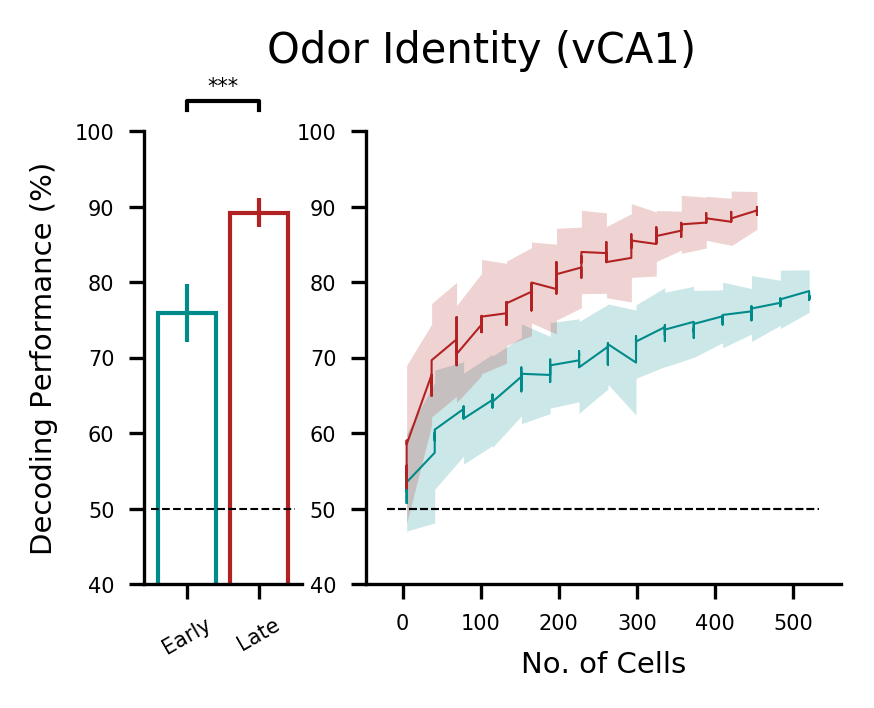

In [21]:
fig, axs = pl.subplots(1, 2, figsize=(3, 2), gridspec_kw={'width_ratios':[1,3]})

plot_scores_compare2(scores_gmin_tb_6['pre'][:n_loops].mean(1), scores_gmin_tb_6['post'][:n_loops].mean(1), chance=50,
                     ax=axs[0], colors=[dark_co[1],dark_co[3]],tick_lab=['Early','Late'])
plot_scores_vs_ncells(n_cells_6['pre'], scores_tb_6_ncells['pre'].mean(1), dot_color=(0.7, 0.7, 1), color=dark_co[1], chance=50, 
                      ax=axs[1], labels=False,dots=False)
plot_scores_vs_ncells(n_cells_6['post'], scores_tb_6_ncells['post'].mean(1), color=dark_co[3],chance=50,
                      ax=axs[1], labels=False,dots=False)

axs[1].set_xlabel("No. of Cells")

fig.suptitle("Odor Identity (vCA1)", fontsize=10, y=1.05)

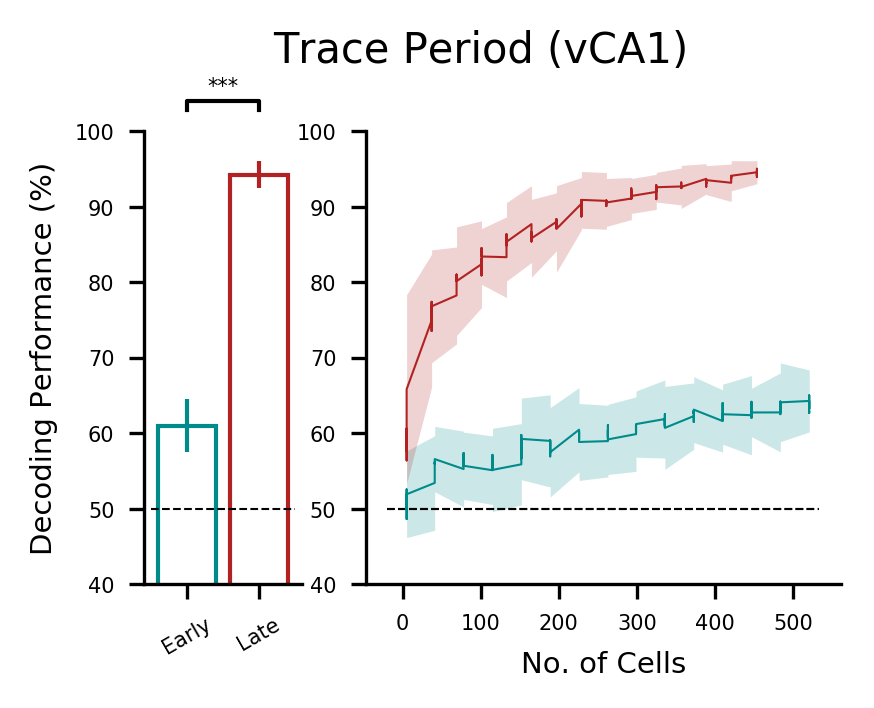

In [22]:
fig, axs = pl.subplots(1, 2, figsize=(3, 2), gridspec_kw={'width_ratios':[1,3]})

plot_scores_compare2(scores_gmin_tb_8['pre'][:n_loops].mean(1), scores_gmin_tb_8['post'][:n_loops].mean(1), chance=50,
                     ax=axs[0], colors=[dark_co[1],dark_co[3]],tick_lab=['Early','Late'])
plot_scores_vs_ncells(n_cells_8['pre'], scores_tb_8_ncells['pre'].mean(1), dot_color=(0.7, 0.7, 1), color=dark_co[1], chance=50, 
                      ax=axs[1], labels=False,dots=False)
plot_scores_vs_ncells(n_cells_8['post'], scores_tb_8_ncells['post'].mean(1), color=dark_co[3],chance=50,
                      ax=axs[1], labels=False,dots=False)

axs[1].set_xlabel("No. of Cells")

fig.suptitle("Trace Period (vCA1)", fontsize=10,y=1.05)

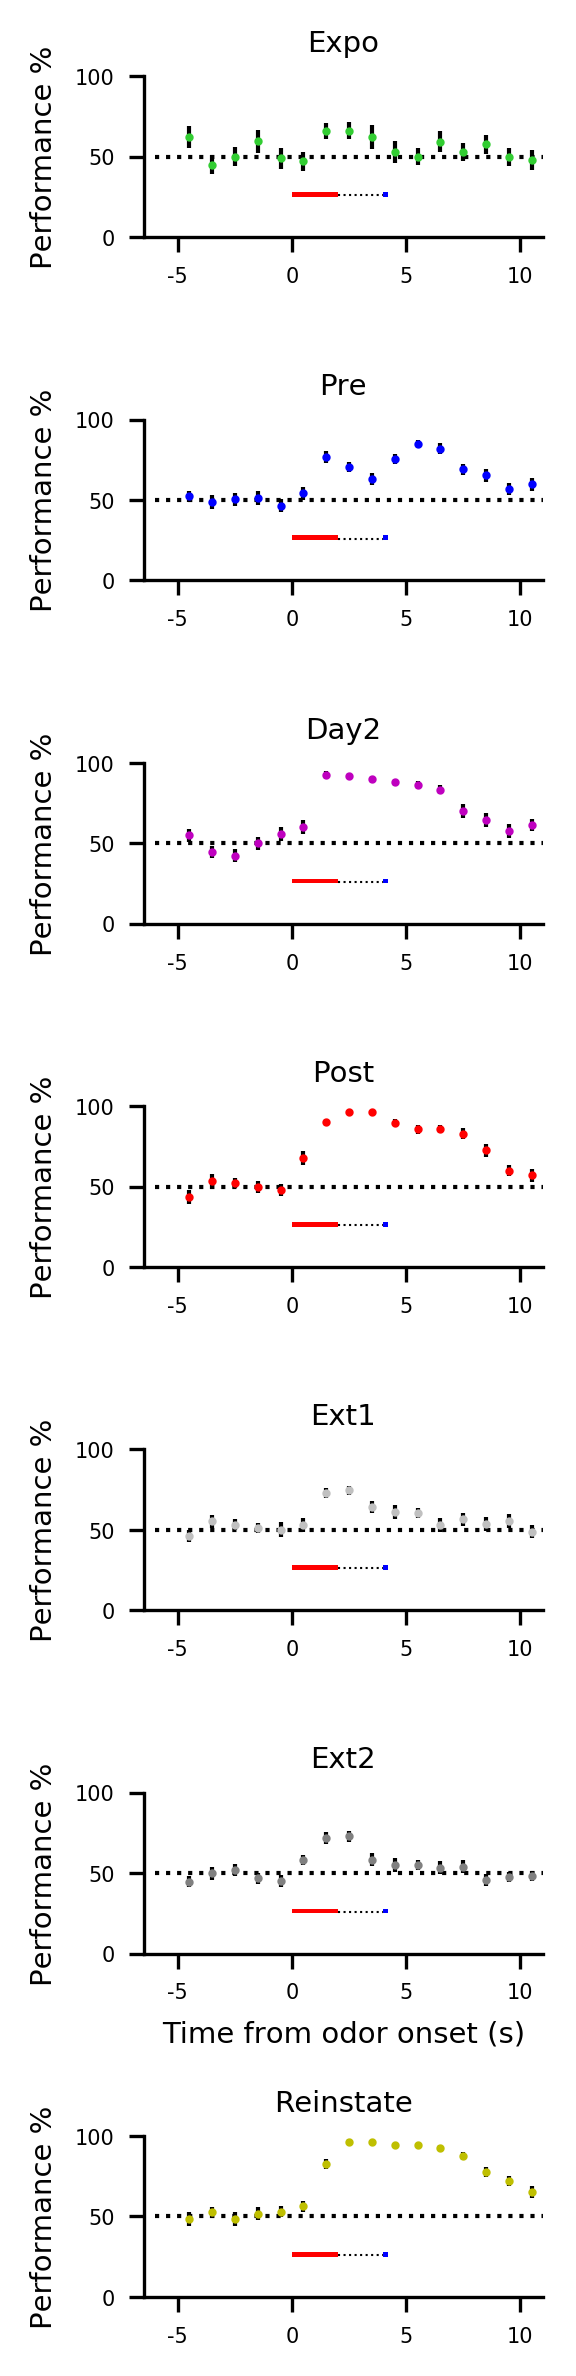

In [23]:
fig, ax = pl.subplots(7,1, figsize=(2, 8))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax[0].plot(t-4.5, np.mean(eval("scores_tb_%s['expo']"%t))*100, 'o', color='limegreen', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_%s['expo']"%t))*100
    s = np.std(eval("scores_tb_%s['expo']"%t))*100 / np.sqrt(eval("scores_tb_%s['expo']"%t).shape[-1])
    ax[0].errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax[1].plot(t-4.5, np.mean(eval("scores_tb_%s['pre']"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_%s['pre']"%t))*100
    s = np.std(eval("scores_tb_%s['pre']"%t))*100 / np.sqrt(eval("scores_tb_%s['pre']"%t).shape[-1])
    ax[1].errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax[2].plot(t-4.5, np.mean(eval("scores_tb_%s['d2']"%t))*100, 'o', color='m', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_%s['d2']"%t))*100
    s = np.std(eval("scores_tb_%s['d2']"%t))*100 / np.sqrt(eval("scores_tb_%s['d2']"%t).shape[-1])
    ax[2].errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax[3].plot(t-4.5, np.mean(eval("scores_tb_%s['post']"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_%s['post']"%t))*100
    s = np.std(eval("scores_tb_%s['post']"%t))*100 / np.sqrt(eval("scores_tb_%s['post']"%t).shape[-1])
    ax[3].errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax[4].plot(t-4.5, np.mean(eval("scores_tb_%s['ext1']"%t))*100, 'o', color='silver', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_%s['ext1']"%t))*100
    s = np.std(eval("scores_tb_%s['ext1']"%t))*100 / np.sqrt(eval("scores_tb_%s['ext1']"%t).shape[-1])
    ax[4].errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax[5].plot(t-4.5, np.mean(eval("scores_tb_%s['ext2']"%t))*100, 'o', color='grey', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_%s['ext2']"%t))*100
    s = np.std(eval("scores_tb_%s['ext2']"%t))*100 / np.sqrt(eval("scores_tb_%s['ext2']"%t).shape[-1])
    ax[5].errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax[6].plot(t-4.5, np.mean(eval("scores_tb_%s['renew']"%t))*100, 'o', color='y', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_tb_%s['renew']"%t))*100
    s = np.std(eval("scores_tb_%s['renew']"%t))*100 / np.sqrt(eval("scores_tb_%s['renew']"%t).shape[-1])
    ax[6].errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
for x in range (0,7):
    ax[x].set_ylim(0, 100)
    ax[x].set_xlim(-6.5, 11)
    ax[x].set_xticks(np.arange(-5,11, 5))
    ax[x].set_xticklabels(np.arange(-5,11, 5))
    ax[x].hlines(50, -6,11, color='k', lw=1, linestyles='dotted')
    ax[5].set_xlabel('Time from odor onset (s)')
    ax[x].set_ylabel('Performance %')
    pt.plot_period_bar(ax[x], 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
    pt.plot_period_bar(ax[x], 25, start_end=(4, 4.2), color='b', delta_y=3)
    ax[x].hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax[0].set_title('Expo')
ax[1].set_title('Pre')
ax[2].set_title('Day2')
ax[3].set_title('Post')
ax[4].set_title('Ext1')
ax[5].set_title('Ext2')
ax[6].set_title('Reinstate')
fig.tight_layout(pad=2)


fig.savefig('../img/%s.jpg'%NOTEBOOK_NAME)

# Now for equalizing cell #s across all sess by using global min

In [24]:
#get number of vHPC cells used for decoding
cell_total = ['total_cells_expo', 'total_cells_pre', 'total_cells_post','total_cells_ext1','total_cells_ext2','total_cells_renew']
for tot in cell_total:
    what = ut.load_variable('%s'%(tot), '../notebooks/autorestore/decoding_combined_vhpc/')
    exec('%s_vHPC = what'%(tot))
    print '%s_vHPC ='%(tot),
    print what

total_cells_expo_vHPC = 563
total_cells_pre_vHPC = 521
total_cells_post_vHPC = 454
total_cells_ext1_vHPC = 475
total_cells_ext2_vHPC = 518
total_cells_renew_vHPC = 473


In [25]:
#get number of vdPC cells used for decoding
cell_total = ['total_cells_expo', 'total_cells_pre', 'total_cells_post','total_cells_ext1','total_cells_ext2','total_cells_renew']
for tot in cell_total:
    what = ut.load_variable('%s'%(tot), '../notebooks/autorestore/decoding_combined_dhpc/')
    exec('%s_dHPC = what'%(tot))
    print '%s_dHPC ='%(tot),
    print what

total_cells_expo_dHPC = 732
total_cells_pre_dHPC = 578
total_cells_post_dHPC = 842
total_cells_ext1_dHPC = 714
total_cells_ext2_dHPC = 759
total_cells_renew_dHPC = 668


In [26]:
n_cells = np.min((total_cells_pre_vHPC,total_cells_pre_dHPC, total_cells_post_vHPC,total_cells_post_dHPC,
                total_cells_ext1_vHPC,total_cells_ext1_dHPC, total_cells_ext2_vHPC,total_cells_ext2_dHPC,
                total_cells_renew_vHPC,total_cells_renew_dHPC, total_cells_expo_vHPC,total_cells_expo_dHPC))

In [27]:
for t in range(0,16): # number of time bins
    exec('scores_gmin_tb_%s = {}'%t)
    n_loops = 30
    for sess in sessions:
        print sess,
        print t,
        eval("scores_gmin_tb_%s"%t)[sess] = np.r_[[do_test_within(eval('patterns_tb_%s_%s'%(t,sess)),eval('labels_%s'%sess),n_cells=n_cells) for i in range(n_loops)]]

expo 0 pre 0 d2 0 post 0 ext1 0 ext2 0 renew 0 expo 1 pre 1 d2 1 post 1 ext1 1 ext2 1 renew 1 expo 2 pre 2 d2 2 post 2 ext1 2 ext2 2 renew 2 expo 3 pre 3 d2 3 post 3 ext1 3 ext2 3 renew 3 expo 4 pre 4 d2 4 post 4 ext1 4 ext2 4 renew 4 expo 5 pre 5 d2 5 post 5 ext1 5 ext2 5 renew 5 expo 6 pre 6 d2 6 post 6 ext1 6 ext2 6 renew 6 expo 7 pre 7 d2 7 post 7 ext1 7 ext2 7 renew 7 expo 8 pre 8 d2 8 post 8 ext1 8 ext2 8 renew 8 expo 9 pre 9 d2 9 post 9 ext1 9 ext2 9 renew 9 expo 10 pre 10 d2 10 post 10 ext1 10 ext2 10 renew 10 expo 11 pre 11 d2 11 post 11 ext1 11 ext2 11 renew 11 expo 12 pre 12 d2 12 post 12 ext1 12 ext2 12 renew 12 expo 13 pre 13 d2 13 post 13 ext1 13 ext2 13 renew 13 expo 14 pre 14 d2 14 post 14 ext1 14 ext2 14 renew 14 expo 15 pre 15 d2 15 post 15 ext1 15 ext2 15 renew 15


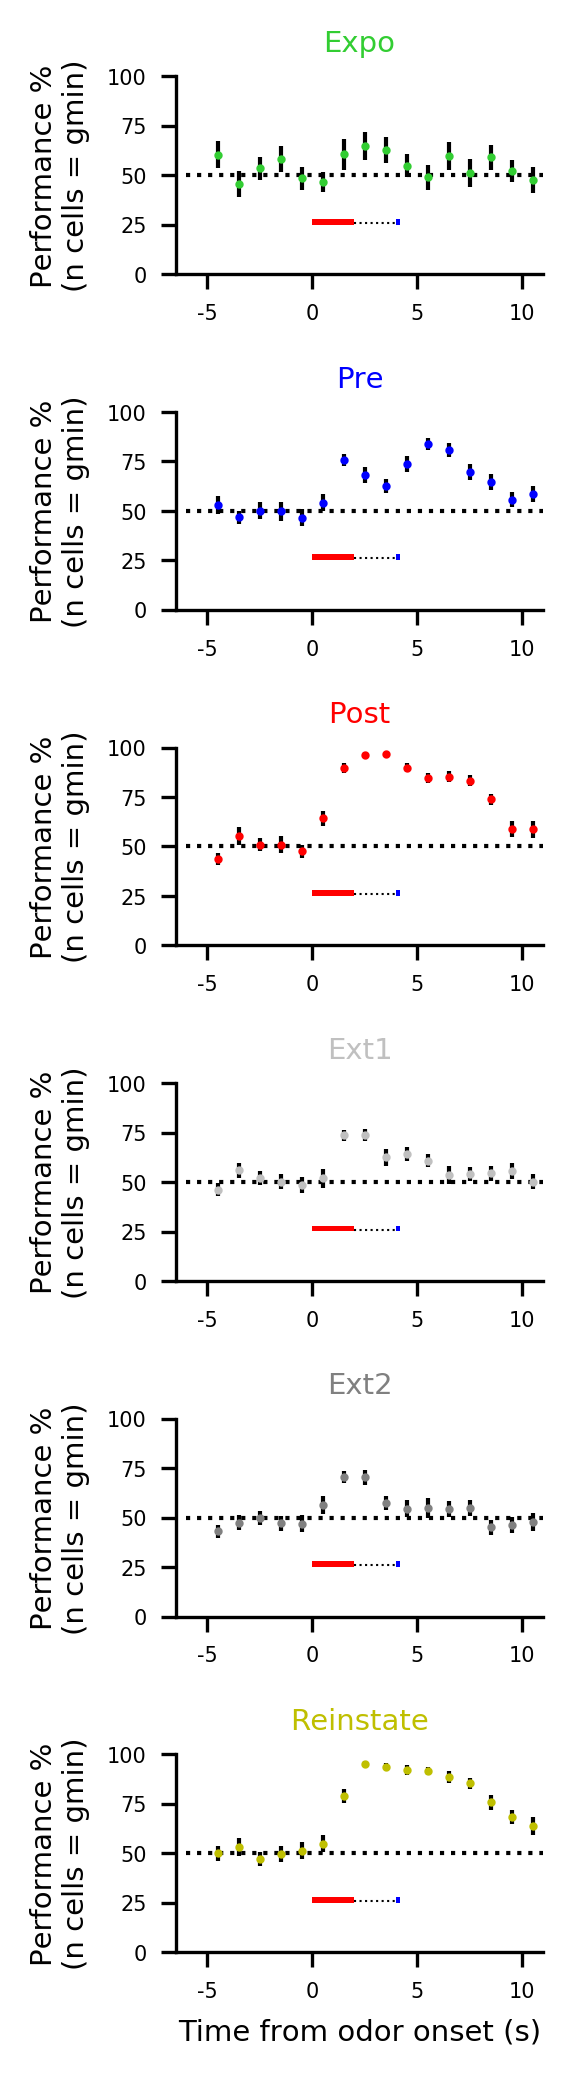

In [28]:
fig, ax = pl.subplots(6,1, figsize=(2, 7))

#t = np.arange(t_start0, t_stop0, delta_t0)
# ax.fill_between(t+np.diff(t)[0]/2.,
#                 (scores.mean(1) + np.std(scores, 1))*100,
#                 (scores.mean(1) - np.std(scores, 1))*100,
#                 lw=0, color='0.8')
for t in range(0,16):
    ax[0].plot(t-4.5, np.mean(eval("scores_gmin_tb_%s['expo']"%t))*100, 'o', color='limegreen', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_gmin_tb_%s['expo']"%t))*100
    s = np.std(eval("scores_gmin_tb_%s['expo']"%t))*100 / np.sqrt(eval("scores_gmin_tb_%s['expo']"%t).shape[-1])
    ax[0].errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax[1].plot(t-4.5, np.mean(eval("scores_gmin_tb_%s['pre']"%t))*100, 'o', color='blue', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_gmin_tb_%s['pre']"%t))*100
    s = np.std(eval("scores_gmin_tb_%s['pre']"%t))*100 / np.sqrt(eval("scores_gmin_tb_%s['pre']"%t).shape[-1])
    ax[1].errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax[2].plot(t-4.5, np.mean(eval("scores_gmin_tb_%s['post']"%t))*100, 'o', color='red', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_gmin_tb_%s['post']"%t))*100
    s = np.std(eval("scores_gmin_tb_%s['post']"%t))*100 / np.sqrt(eval("scores_gmin_tb_%s['post']"%t).shape[-1])
    ax[2].errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax[3].plot(t-4.5, np.mean(eval("scores_gmin_tb_%s['ext1']"%t))*100, 'o', color='silver', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_gmin_tb_%s['ext1']"%t))*100
    s = np.std(eval("scores_gmin_tb_%s['ext1']"%t))*100 / np.sqrt(eval("scores_gmin_tb_%s['ext1']"%t).shape[-1])
    ax[3].errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax[4].plot(t-4.5, np.mean(eval("scores_gmin_tb_%s['ext2']"%t))*100, 'o', color='grey', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_gmin_tb_%s['ext2']"%t))*100
    s = np.std(eval("scores_gmin_tb_%s['ext2']"%t))*100 / np.sqrt(eval("scores_gmin_tb_%s['ext2']"%t).shape[-1])
    ax[4].errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
    ax[5].plot(t-4.5, np.mean(eval("scores_gmin_tb_%s['renew']"%t))*100, 'o', color='y', ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.mean(eval("scores_gmin_tb_%s['renew']"%t))*100
    s = np.std(eval("scores_gmin_tb_%s['renew']"%t))*100 / np.sqrt(eval("scores_gmin_tb_%s['renew']"%t).shape[-1])
    ax[5].errorbar(t-4.5, m, s, lw=0, zorder=0, color= 'k', elinewidth=1)
for x in range (0,6):
    ax[x].set_ylim(0, 100)
    ax[x].set_xlim(-6.5, 11)
    ax[x].set_xticks(np.arange(-5,11, 5))
    ax[x].set_xticklabels(np.arange(-5,11, 5))
    ax[x].hlines(50, -6,11, color='k', lw=1, linestyles='dotted')
    ax[5].set_xlabel('Time from odor onset (s)')
    ax[x].set_ylabel('Performance %\n(n cells = gmin)')
    pt.plot_period_bar(ax[x], 25, start_end=(0, 2), color='r', delta_y=3)
# pt.plot_period_bar(ax, 25, start_end=(2, 4), color='0.7', delta_y=2)
    pt.plot_period_bar(ax[x], 25, start_end=(4, 4.2), color='b', delta_y=3)
    ax[x].hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax[0].set_title('Expo', color='limegreen')
ax[1].set_title('Pre', color = 'b')
ax[2].set_title('Post', color = 'r')
ax[3].set_title('Ext1', color = 'silver')
ax[4].set_title('Ext2', color = 'grey')
ax[5].set_title('Reinstate', color = 'y')
fig.tight_layout(pad=2)


fig.savefig('../img/%s_gmin.jpg'%NOTEBOOK_NAME)

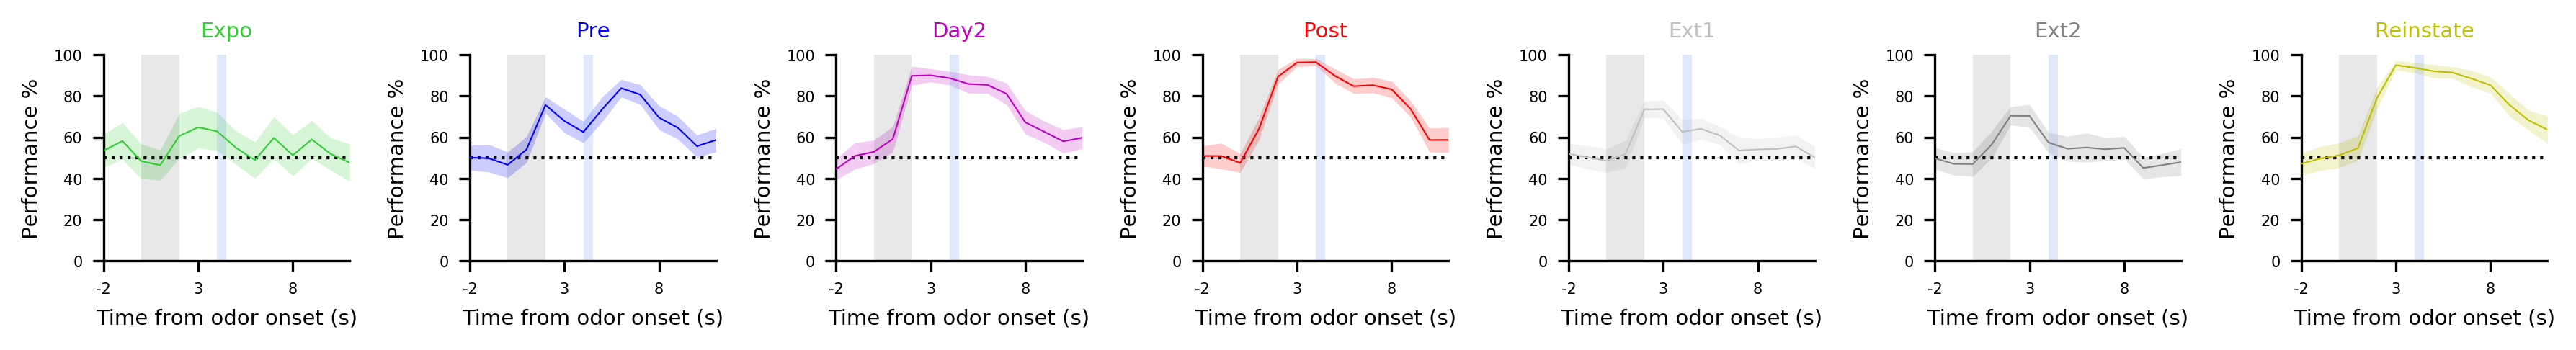

In [29]:
fig, ax = pl.subplots(1,7, figsize=(12, 1.7))

for r,sess,c in zip(range(7),sessions,('limegreen','b','m','r','silver','grey','y')):
    ax[r].plot([(t-4) for t in range(16)], [(np.mean(eval("scores_gmin_tb_%s[sess]"%t))*100) for t in range(16)], color=c, ls='-',lw=.5, zorder=19 ,ms=1)
    m = np.array([(np.mean(eval("scores_gmin_tb_%s[sess]"%t))*100) for t in range(16)])
    s = np.array([np.std(eval("scores_gmin_tb_%s[sess]"%t))*100 for t in range(16)])
    ax[r].fill_between([(t-4) for t in range(16)],m-s,m+s,alpha=0.2,color=c,linewidth=0)
for x in range (0,7):
    ax[x].set_ylim(0, 100)
    ax[x].set_xlim(-2, 11)
    ax[x].set_xticks(np.arange(-2,11, 5))
    ax[x].set_xticklabels(np.arange(-2,11, 5))
    ax[x].hlines(50, -2,11, color='k', lw=1, linestyles='dotted')
    ax[x].set_xlabel('Time from odor onset (s)')
    ax[x].set_ylabel('Performance %')
    pt.plot_period_bar(ax[x], 0, start_end=(0, 2), color='k', delta_y=100,alpha=.09)
    pt.plot_period_bar(ax[x], 0, start_end=(4, 4.5), color='cornflowerblue', delta_y=100, alpha=.2)
ax[0].set_title('Expo', color='limegreen')
ax[1].set_title('Pre', color = 'b')
ax[2].set_title('Day2', color = 'm')
ax[3].set_title('Post', color = 'r')
ax[4].set_title('Ext1', color = 'silver')
ax[5].set_title('Ext2', color = 'grey')
ax[6].set_title('Reinstate', color = 'y')
fig.tight_layout(pad=2)


fig.savefig('../img/%s_gmin_horizontal.pdf'%NOTEBOOK_NAME)
fig.savefig('../final-ish figures/%s_gmin_horizontal.pdf'%NOTEBOOK_NAME)

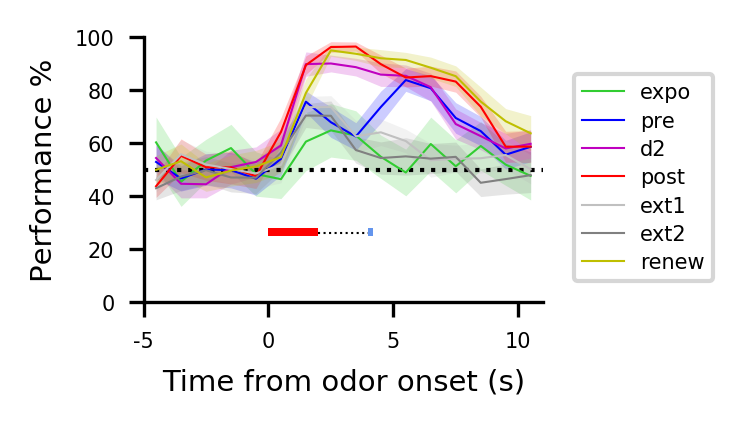

In [30]:
fig, ax = pl.subplots(1,1, figsize=(2, 1.5))

for sess,c in zip(sessions,('limegreen','b','m','r','silver','grey','y')):
    ax.plot([(t-4.5) for t in range(16)], [(np.mean(eval("scores_gmin_tb_%s[sess]"%t))*100) for t in range(16)], color=c,label=sess)
    m = np.array([(np.mean(eval("scores_gmin_tb_%s[sess]"%t))*100) for t in range(16)])
    s = np.array([np.std(eval("scores_gmin_tb_%s[sess]"%t))*100 for t in range(16)])
    ax.fill_between([(t-4.5) for t in range(16)],m-s,m+s,alpha=0.2,color=c,linewidth=0)
ax.set_ylim(0, 100)
ax.set_xlim(-5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.set_xticklabels(np.arange(-5,11, 5))
ax.hlines(50, -5,11, color='k', lw=1, linestyles='dotted')
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='cornflowerblue', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.legend(bbox_to_anchor=(1.05,.9),labelspacing=0.4,fontsize=5)
#ax[0].set_title('Expo', color='limegreen')
#ax[1].set_title('Pre', color = 'b')
#ax[2].set_title('Post', color = 'r')
#ax[3].set_title('Ext1', color = 'silver')
#ax[4].set_title('Ext2', color = 'grey')
#ax[5].set_title('Reinstate', color = 'y')
fig.tight_layout(pad=2)


fig.savefig('../img/%s_gmin_combined.pdf'%NOTEBOOK_NAME)

## decode using subset of trials

In [31]:
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.svm import SVC

def do_test_within_subsets(patterns, labels, n_cells=None,start_trial=None,end_trial=None):
#     which_train = range(90)
#     which_test = range(90)
#    cv =LeaveOneOut()
    
    which_train = {}
    which_test = {}
    for ani in patterns.keys():
        #split trials into train and test
        if start_trial != None:   #take subset of trials?
            which_train_aa = np.random.permutation(np.where(labels[ani][start_trial:end_trial]==0)[0])
            which_train_a = which_train_aa+start_trial
        else:
            which_train_a = np.random.permutation(np.where(labels[ani]==0)[0])
        which_test_a = which_train_a[:len(which_train_a)/2]
        which_train_a = which_train_a[len(which_train_a)/2:]
        
        if start_trial != None:   #take subset of trials?
            which_train_bb = np.random.permutation(np.where(labels[ani][start_trial:end_trial]==1)[0])
            which_train_b = which_train_bb+start_trial
        else:
            which_train_b = np.random.permutation(np.where(labels[ani]==1)[0])
        which_test_b = which_train_b[:len(which_train_b)/2]
        which_train_b = which_train_b[len(which_train_b)/2:]
        
        which_train[ani] = np.concatenate((which_train_a, which_train_b))
        which_test[ani] = np.concatenate((which_test_a, which_test_b))
    
    patterns_t = patterns.copy()
    labels_t = labels.copy()
    patterns_T = patterns.copy()
    labels_T = labels.copy()
    for ani in patterns.keys():
        patterns_t[ani] = patterns[ani][which_train[ani]]
        labels_t[ani] = labels[ani][which_train[ani]]
        patterns_T[ani] = patterns[ani][which_test[ani]]
        labels_T[ani] = labels[ani][which_test[ani]]
    patterns_comb_train, labels_comb = ut.combine_patterns(patterns_t, labels_t)
    patterns_comb_test, labels_comb = ut.combine_patterns(patterns_T, labels_T)
    
    if n_cells is None:
        cells = list(range(patterns_comb_train.shape[1]))
    else:
        cells = np.random.choice(range(patterns_comb_train.shape[1]), size=n_cells, replace=False)
        
    decoder.fit(patterns_comb_train[:, cells], labels_comb)
    scores = decoder.score(patterns_comb_test[:, cells], labels_comb)
    decoder.fit(patterns_comb_test[:, cells], labels_comb)
    return np.append(scores, decoder.score(patterns_comb_train[:, cells], labels_comb))

In [84]:
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.svm import SVC

def do_test_within_subsets_individ_ani(patterns, labels, n_cells=None,start_trial=None,end_trial=None):
#     which_train = range(90)
#     which_test = range(90)
#    cv =LeaveOneOut()
    
    which_train = {}
    which_test = {}
    for ani in patterns.keys():
        #split trials into train and test
        if start_trial != None:   #take subset of trials?
            which_train_aa = np.random.permutation(np.where(labels[ani][start_trial:end_trial]==0)[0])
            which_train_a = which_train_aa+start_trial
        else:
            which_train_a = np.random.permutation(np.where(labels[ani]==0)[0])
        which_test_a = which_train_a[:len(which_train_a)/2]
        which_train_a = which_train_a[len(which_train_a)/2:]
        
        if start_trial != None:   #take subset of trials?
            which_train_bb = np.random.permutation(np.where(labels[ani][start_trial:end_trial]==1)[0])
            which_train_b = which_train_bb+start_trial
        else:
            which_train_b = np.random.permutation(np.where(labels[ani]==1)[0])
        which_test_b = which_train_b[:len(which_train_b)/2]
        which_train_b = which_train_b[len(which_train_b)/2:]
        
        which_train[ani] = np.concatenate((which_train_a, which_train_b))
        which_test[ani] = np.concatenate((which_test_a, which_test_b))
    scores={}
    patterns_t = patterns.copy()
    labels_t = labels.copy()
    patterns_T = patterns.copy()
    labels_T = labels.copy()
    for ani in patterns.keys():
        patterns_t[ani] = patterns[ani][which_train[ani]]
        labels_t[ani] = labels[ani][which_train[ani]]
        patterns_T[ani] = patterns[ani][which_test[ani]]
        labels_T[ani] = labels[ani][which_test[ani]]
        decoder.fit(patterns_t[ani], labels_t[ani])
        scores[ani] = decoder.score(patterns_T[ani], labels_T[ani])
        decoder.fit(patterns_T[ani], labels_T[ani])

    #patterns_comb_train, labels_comb = ut.combine_patterns(patterns_t, labels_t)
    #patterns_comb_test, labels_comb = ut.combine_patterns(patterns_T, labels_T)
    
# if n_cells is None:
   #     cells = list(range(patterns_comb_train.shape[1]))
# else:
   #     cells = np.random.choice(range(patterns_comb_train.shape[1]), size=n_cells, replace=False)
        
 
    return scores

In [79]:
#for n_cells = total_cells_post_vHPC = 454

In [80]:
%%time
#decode using subset of trials and all cells
n_loops = 30
for t in range(16):
        for phase,trls in zip(['early','mid','late'],[(0,40),(41,80),(81,120)]):
            exec("scores_gmin_tb_%s_%s = {}"%(t,phase))
            for sess in sessions[1:]:
                exec("scores_gmin_tb_%s_%s[sess] = [do_test_within_subsets(patterns_tb_%s_%s,\
                      labels_%s, n_cells=n_cells,start_trial=%s, end_trial=%s) for i in range(n_loops)]"%(t,phase,
                                                                                    t,sess,sess,trls[0],trls[1]))
        print t,"DONE!    ",

0 DONE!     1 DONE!     2 DONE!     3 DONE!     4 DONE!     5 DONE!     6 DONE!     7 DONE!     8 DONE!     9 DONE!     10 DONE!     11 DONE!     12 DONE!     13 DONE!     14 DONE!     15 DONE!    CPU times: user 9min 22s, sys: 644 ms, total: 9min 23s
Wall time: 9min 22s



In [ ]:
%%time
#decode using subset of trials and all cells
n_loops = 30
for t in :
        for phase,trls in zip(['early','mid','late'],[(0,40),(41,80),(81,120)]):
            exec("scores_gmin_tb_%s_%s = {}"%(t,phase))
            for sess in sessions[1:]:
                exec("scores_gmin_tb_%s_%s[sess] = [do_test_within_subsets(patterns_tb_%s_%s,\
                      labels_%s, n_cells=n_cells,start_trial=%s, end_trial=%s) for i in range(n_loops)]"%(t,phase,
                                                                                    t,sess,sess,trls[0],trls[1]))
        print t,"DONE!    ",

In [87]:
%%time
#decode using subset of trials and all cells
n_loops = 30
for t in [6,8]:
        for phase,trls in zip(['early','mid','late'],[(0,40),(41,80),(81,120)]):
            exec("scores_gmin_tb_%s_%s_individ = {}"%(t,phase))
            for sess in sessions[1:]:
                exec("scores_gmin_tb_%s_%s_individ[sess] = [do_test_within_subsets_individ_ani(patterns_tb_%s_%s,\
                      labels_%s, n_cells=n_cells,start_trial=%s, end_trial=%s) for i in range(n_loops)]"%(t,phase,
                                                                                    t,sess,sess,trls[0],trls[1]))
        print t,"DONE!    ",

6 DONE!     8 DONE!    CPU times: user 9 s, sys: 20 ms, total: 9.02 s
Wall time: 9 s



In [ ]:
scores_gmin_

In [33]:
%%time
#decode using subset of trials and all cells
n_loops = 30
for t in range(16):
        for phase,trls in zip(['Trials1to30','Trials31to60','Trials61to90','Trials91to120'],[(0,30),(30,60),(60,90),(90,120)]):
            exec("scores_gmin_tb_%s_%s = {}"%(t,phase))
            for sess in sessions[1:]:
                exec("scores_gmin_tb_%s_%s[sess] = [do_test_within_subsets(patterns_tb_%s_%s,\
                      labels_%s, n_cells=n_cells,start_trial=%s, end_trial=%s) for i in range(n_loops)]"%(t,phase,
                                                                                    t,sess,sess,trls[0],trls[1]))
        print t,"DONE!    ",

0 DONE!     1 DONE!     2 DONE!     3 DONE!     4 DONE!     5 DONE!     6 DONE!     7 DONE!     8 DONE!     9 DONE!     10 DONE!     11 DONE!     12 DONE!     13 DONE!     14 DONE!     15 DONE!    CPU times: user 11min 42s, sys: 708 ms, total: 11min 43s
Wall time: 11min 42s



In [34]:
%%time
#decode using subset of trials and all cells
n_loops = 30
for t in range(16):
        for phase,trls in zip(['Trials1to20','Trials21to40','Trials81to100','Trials101to120'],
                              [(0,20),(21,40),(81,100),(101,120)]):
            exec("scores_gmin_tb_%s_%s = {}"%(t,phase))
            for sess in sessions[1:]:
                exec("scores_gmin_tb_%s_%s[sess] = [do_test_within_subsets(patterns_tb_%s_%s,\
                      labels_%s, n_cells=n_cells,start_trial=%s, end_trial=%s) for i in range(n_loops)]"%(t,phase,
                                                                                    t,sess,sess,trls[0],trls[1]))
        print t,"DONE!    ",

0 DONE!     1 DONE!     2 DONE!     3 DONE!     4 DONE!     5 DONE!     6 DONE!     7 DONE!     8 DONE!     9 DONE!     10 DONE!     11 DONE!     12 DONE!     13 DONE!     14 DONE!     15 DONE!    CPU times: user 10min 22s, sys: 668 ms, total: 10min 23s
Wall time: 10min 22s



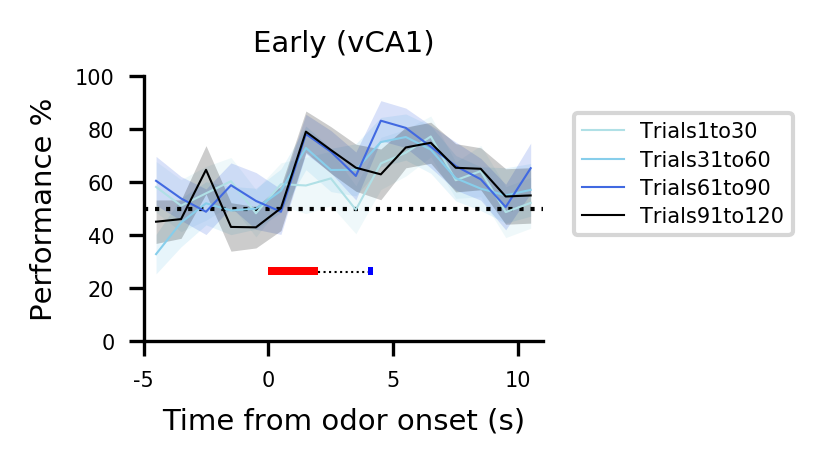

In [35]:
fig, ax = pl.subplots(1,1, figsize=(2, 1.5))

for phase,c in zip(['Trials1to30','Trials31to60','Trials61to90','Trials91to120'],('powderblue','skyblue','royalblue','k')):
    ax.plot([(t-4.5) for t in range(16)], [(np.mean(eval("scores_gmin_tb_%s_%s['pre']"%(t,phase)))*100) for t in range(16)], color=c,label=phase)
    m = np.array([(np.mean(eval("scores_gmin_tb_%s_%s['pre']"%(t,phase)))*100) for t in range(16)])
    s = np.array([np.std(eval("scores_gmin_tb_%s_%s['pre']"%(t,phase)))*100 for t in range(16)])
    ax.fill_between([(t-4.5) for t in range(16)],m-s,m+s,alpha=0.2,color=c,linewidth=0)
ax.set_ylim(0, 100)
ax.set_xlim(-5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.set_xticklabels(np.arange(-5,11, 5))
ax.hlines(50, -5,11, color='k', lw=1, linestyles='dotted')
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.legend(bbox_to_anchor=(1.05,.9),labelspacing=0.4,fontsize=5)
fig.tight_layout(pad=2)
ax.set_title('Early (vCA1)')


#fig.savefig('../img/%s_gmin_combined.pdf'%NOTEBOOK_NAME)

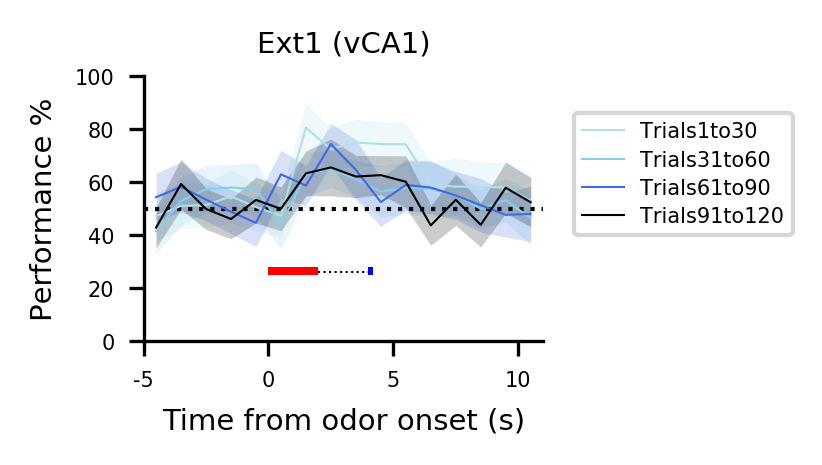

In [36]:
fig, ax = pl.subplots(1,1, figsize=(2, 1.5))

for phase,c in zip(['Trials1to30','Trials31to60','Trials61to90','Trials91to120'],(('powderblue','skyblue','royalblue','k'))):
    ax.plot([(t-4.5) for t in range(16)], [(np.mean(eval("scores_gmin_tb_%s_%s['ext1']"%(t,phase)))*100) for t in range(16)], color=c,label=phase)
    m = np.array([(np.mean(eval("scores_gmin_tb_%s_%s['ext1']"%(t,phase)))*100) for t in range(16)])
    s = np.array([np.std(eval("scores_gmin_tb_%s_%s['ext1']"%(t,phase)))*100 for t in range(16)])
    ax.fill_between([(t-4.5) for t in range(16)],m-s,m+s,alpha=0.2,color=c,linewidth=0)
ax.set_ylim(0, 100)
ax.set_xlim(-5, 11)
ax.set_xticks(np.arange(-5,11, 5))
ax.set_xticklabels(np.arange(-5,11, 5))
ax.hlines(50, -5,11, color='k', lw=1, linestyles='dotted')
ax.set_xlabel('Time from odor onset (s)')
ax.set_ylabel('Performance %')
pt.plot_period_bar(ax, 25, start_end=(0, 2), color='r', delta_y=3)
pt.plot_period_bar(ax, 25, start_end=(4, 4.2), color='b', delta_y=3)
ax.hlines(25+1, 2, 4, color='k', lw=0.5, linestyles='dotted')
ax.legend(bbox_to_anchor=(1.05,.9),labelspacing=0.4,fontsize=5)
fig.tight_layout(pad=2)
ax.set_title('Ext1 (vCA1)')


#fig.savefig('../img/%s_gmin_combined.pdf'%NOTEBOOK_NAME)

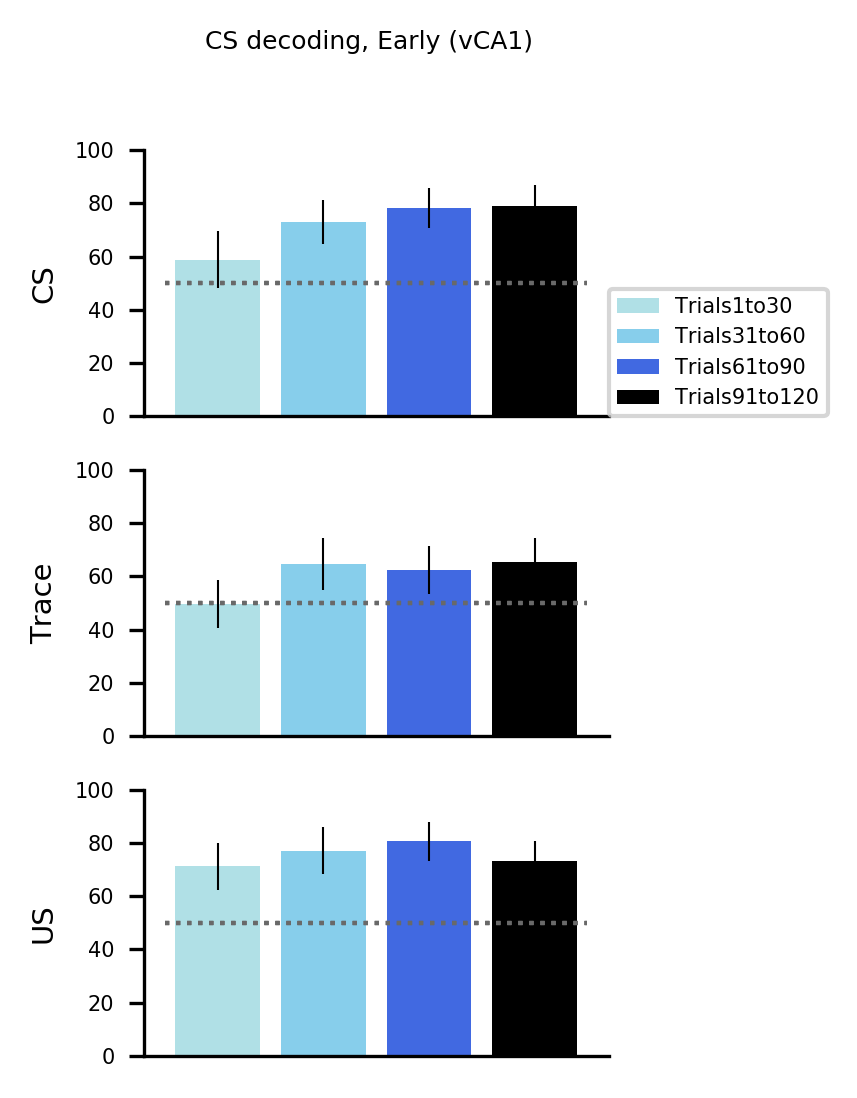

In [37]:
fig,ax = pl.subplots(3,1,figsize=(2,4),sharex=True,sharey=True)

for phase,c,z in zip(['Trials1to30','Trials31to60','Trials61to90','Trials91to120'],(('powderblue','skyblue','royalblue','k')),range(4)):
    for tb,tb_la,r in zip((6,8,10),('CS','Trace','US',),(range(3))):
        s = np.array(np.std(eval("scores_gmin_tb_%s_%s['pre']"%(tb,phase)))*100)
        ax[r].bar(z, (np.mean(eval("scores_gmin_tb_%s_%s['pre']"%(tb,phase)))*100), color=c,label=phase,yerr=s)
        ax[r].tick_params(axis='x',bottom=False,labelbottom=False) # labels along the bottom edge are off
        ax[r].set_ylabel(tb_la)
        ax[r].set_ylim(0,100)
        ax[r].hlines(50, -.5,3.5, color='dimgrey', lw=1, linestyles='dotted')
ax[0].legend(loc=(1,0))
pl.suptitle('CS decoding, Early (vCA1)')
    

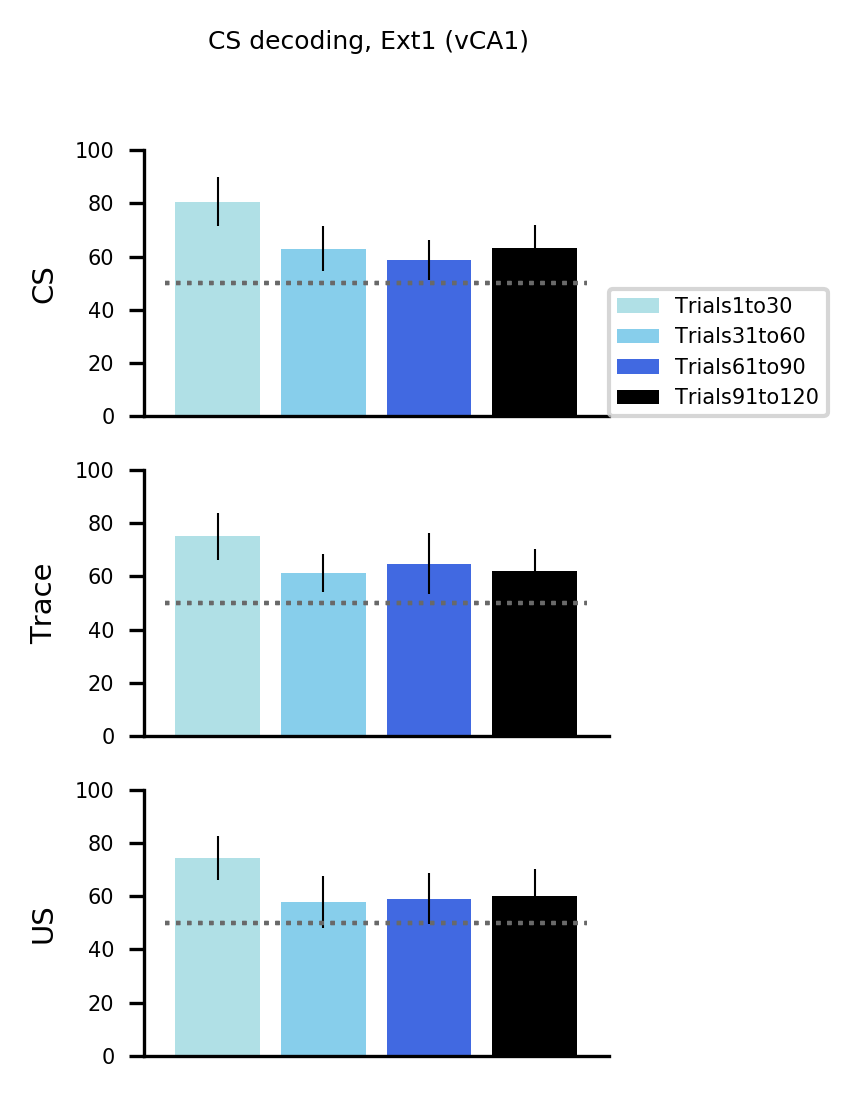

In [38]:
fig,ax = pl.subplots(3,1,figsize=(2,4),sharex=True,sharey=True)

for phase,c,z in zip(['Trials1to30','Trials31to60','Trials61to90','Trials91to120'],(('powderblue','skyblue','royalblue','k')),range(4)):
    for tb,tb_la,r in zip((6,8,10),('CS','Trace','US',),(range(3))):
        s = np.array(np.std(eval("scores_gmin_tb_%s_%s['ext1']"%(tb,phase)))*100)
        ax[r].bar(z, (np.mean(eval("scores_gmin_tb_%s_%s['ext1']"%(tb,phase)))*100), color=c,label=phase,yerr=s)
        ax[r].tick_params(axis='x',bottom=False,labelbottom=False) # labels along the bottom edge are off
        ax[r].set_ylabel(tb_la)
        ax[r].set_ylim(0,100)
        ax[r].hlines(50, -.5,3.5, color='dimgrey', lw=1, linestyles='dotted')
ax[0].legend(loc=(1,0))
pl.suptitle('CS decoding, Ext1 (vCA1)')
    

In [39]:
%%time

n_loops = 30
for t in range(16):
        exec("scores_gmin_tb_%s_20onward = {}"%(t))
        for sess in sessions[1:]:
            exec("scores_gmin_tb_%s_20onward[sess] = [do_test_within_subsets(patterns_tb_%s_%s,\
                  labels_%s, n_cells=n_cells,start_trial=20, end_trial=120) for i in range(n_loops)]"%(t,
                                                                                t,sess,sess))
        print t,"DONE!    ",

0 DONE!     1 DONE!     2 DONE!     3 DONE!     4 DONE!     5 DONE!     6 DONE!     7 DONE!     8 DONE!     9 DONE!     10 DONE!     11 DONE!     12 DONE!     13 DONE!     14 DONE!     15 DONE!    CPU times: user 4min 10s, sys: 324 ms, total: 4min 10s
Wall time: 4min 9s



# And now for decoding across time bins!

In [40]:
from sklearn.svm import SVC

decoder = SVC(kernel='linear', decision_function_shape='ovo')
def do_test_cross(patterns_t, labels_t, patterns_T, labels_T, n_cells=None):
#     which_train = range(90)
#     which_test = range(90)
    patterns_comb_train, labels_comb = ut.combine_patterns(patterns_t, labels_t)
    patterns_comb_test, labels_comb = ut.combine_patterns(patterns_T, labels_T)
    if n_cells is None:
        cells = list(range(patterns_comb_train.shape[1]))
    else:
        cells = np.random.choice(range(patterns_comb_train.shape[1]), size=n_cells, replace=False)
    decoder.fit(patterns_comb_train[:, cells], labels_comb)
    scores = decoder.score(patterns_comb_test[:, cells], labels_comb)
    decoder.fit(patterns_comb_test[:, cells], labels_comb)
    return np.append(scores, decoder.score(patterns_comb_train[:, cells], labels_comb))

In [41]:
gmin = np.min((total_cells_pre_vHPC,total_cells_pre_dHPC, total_cells_post_vHPC,total_cells_post_dHPC,
                total_cells_ext1_vHPC,total_cells_ext1_dHPC, total_cells_ext2_vHPC,total_cells_ext2_dHPC,
                total_cells_renew_vHPC,total_cells_renew_dHPC, total_cells_expo_vHPC,total_cells_expo_dHPC))

### running the cell below will take several hours!

In [42]:
##STOP!!! running this takes 5ish hours
#%%time
#ncells=gmin
#n_loops=100
#for t in range (0,16):
#    for c in range (0,16):
#        exec('scores_gmin_tb_%s_VS_%s = {}'%(t,c))
#        for sess in sessions:
#            print sess,t,c
#            print " ",
#            eval('scores_gmin_tb_%s_VS_%s'%(t,c))[sess] = np.r_[[do_test_cross(eval('patterns_tb_%s_%s'%(t,sess)),eval('labels_%s'%sess),
#                                                                eval('patterns_tb_%s_%s'%(c,sess)),eval('labels_%s'%sess),n_cells=gmin) for i in range(n_loops)]]

In [43]:
#for t in range (16):
#    exec('testy%s = {}'%t)
#for sess in sessions:
#    for t in range (16):
#        exec("testy%s['%s'] = []"%(t,sess))
#        for c in range (16):
#            #print eval('testy%s'%t)[sess]
#            eval('testy%s'%t)[sess].insert(c,(eval('scores_gmin_tb_%s_VS_%s'%(t,c))[sess].mean(1)).mean())

In [44]:
##and now replace cross-session decoding score with within-session score where test and train data are from the same time bin
#for sess in sessions:
#    for t in range (16):
#        eval('testy%s'%t)[sess][t] = eval("scores_gmin_tb_%s"%t)[sess].mean()

In [45]:
#testy={}
#for sess in sessions:
#    testy[sess]=(testy0[sess], testy1[sess], testy2[sess], testy3[sess], testy4[sess], testy5[sess], testy6[sess], testy7[sess],
#                 testy8[sess], testy9[sess], testy10[sess], testy11[sess], testy12[sess], testy13[sess], testy14[sess], testy15[sess])
#    np.array([testy[sess]])

In [46]:
#fig, ax = pl.subplots(6, 1, figsize=(3, 15))#, sharex=True, sharey=True)
#vmin=0.5
#vmax=1
#im = ax[0].imshow(testy['expo'],origin='lower', interpolation='nearest',vmin=vmin, vmax=vmax)
#im = ax[1].imshow(testy['pre'],origin='lower', interpolation='nearest',vmin=vmin, vmax=vmax)
#im = ax[2].imshow(testy['post'],origin='lower', interpolation='nearest',vmin=vmin, vmax=vmax)
#im = ax[3].imshow(testy['ext1'],origin='lower', interpolation='nearest',vmin=vmin, vmax=vmax)
#im = ax[4].imshow(testy['ext2'],origin='lower', interpolation='nearest',vmin=vmin, vmax=vmax)
#im = ax[5].imshow(testy['renew'],origin='lower', interpolation='nearest',vmin=vmin,vmax=vmax)
#
#for x in range (0,6):
#    ax[x].set_xticks(range(16))
#    ax[x].set_yticks(range(16))
#    ax[x].set_ylim(2.5, 14.5)
#    ax[x].set_xlim(2.5,14.5)
#    ax[x].set_xticklabels(['-5\nto\n-4','-4\nto\n-3','-3','-2','-1','0\n(CS)','1\n(CS)','2\n(Tr)','3\n(Tr)','4\n(Rw)','5', '6','7','8','9','10'])
#    ax[x].set_yticklabels(['-5\nto\n-4','-4\nto\n-3','-3','-2','-1','(CS) 0','(CS) 1','(Tr) 2','(Tr) 3','(Rw) 4','5', '6','7','8','9','10'])
#    ax[x].set_ylabel('Time(s) from CS onset', fontsize=5)
#    ax[x].set_xlabel('Time(s) from CS onset', fontsize=5)
#
## axs[0].set_xticklabels(np.arange(len(np.unique(labels)))+1)
## axs[0].set_yticklabels(np.arange(len(np.unique(labels)))+1)
#
#ax[0].set_title('Decoding Across Time Bins, Expo', fontsize=7, color='limegreen')
#ax[1].set_title('Pre', fontsize=7, color='b')
#ax[2].set_title('Post', fontsize=7, color='r')
#ax[3].set_title('Ext1', fontsize=7, color='silver')
#ax[4].set_title('Ext2', fontsize=7, color='grey')
#ax[5].set_title('Reinstate', fontsize=7, color='y')
#
#cax = fig.add_axes([.85, 0.86, 0.05, 0.117])
#fig.colorbar(im, cax=cax)
#fig.tight_layout(pad=2.5)
#fig.savefig('../img/%s_gmin_across_bins.jpg'%NOTEBOOK_NAME)

# now, use distinct trials for train and test for decoding across time bins

In [47]:
#trying to use different trials for different time bins
from sklearn.svm import SVC
decoder = SVC(kernel='linear', decision_function_shape='ovo')

def do_test_cross_distinct(patterns_t, labels_t, patterns_T, labels_T, n_cells=None):
    which_train = {}
    which_test = {}
    for ani in patterns_t.keys():
        which_train_a = np.random.permutation(np.where(labels_t[ani]==0)[0])
        which_test_a = which_train_a[:len(which_train_a)/2]
        which_train_a = which_train_a[len(which_train_a)/2:]
        
        which_train_b = np.random.permutation(np.where(labels_t[ani]==1)[0])
        which_test_b = which_train_b[:len(which_train_b)/2]
        which_train_b = which_train_b[len(which_train_b)/2:]
        
        which_train[ani] = np.concatenate((which_train_a, which_train_b))
        which_test[ani] = np.concatenate((which_test_a, which_test_b))
    patterns_dt = patterns_t.copy()
    labels_dt = labels_t.copy()
    patterns_dT = patterns_T.copy()
    labels_dT = labels_T.copy()
    for ani in patterns_t.keys():
        patterns_dt[ani] = patterns_dt[ani][which_train[ani]]
        labels_dt[ani] = labels_dt[ani][which_train[ani]]
        patterns_dT[ani] = patterns_dT[ani][which_test[ani]]
        labels_dT[ani] = labels_dT[ani][which_test[ani]]      
        
    patterns_comb_train, labels_comb = ut.combine_patterns(patterns_dt, labels_dt)
    patterns_comb_test, labels_comb = ut.combine_patterns(patterns_dT, labels_dT)
    
    if n_cells is None:
        cells = list(range(patterns_comb_train.shape[1]))
    else:
        cells = np.random.choice(range(patterns_comb_train.shape[1]), size=n_cells, replace=False)
    
    decoder.fit(patterns_comb_train[:, cells], labels_comb)
    scores = decoder.score(patterns_comb_test[:, cells], labels_comb)
    decoder.fit(patterns_comb_test[:, cells], labels_comb)
    return np.append(scores, decoder.score(patterns_comb_train[:, cells], labels_comb))

## getting reciprocal train and test with function above, but will only extract one way with analysis below

In [48]:
%%time
ncells=gmin
n_loops=30
for t in range (16):
    for c in range (16):
        exec('scores_gmin_tb_distinct_%s_VS_%s = {}'%(t,c))
        for sess in sessions:
            print sess,t,c,
            print' ',
            eval('scores_gmin_tb_distinct_%s_VS_%s'%(t,c))[sess] = np.r_[[do_test_cross_distinct(eval('patterns_tb_%s_%s'%(t,sess)),eval('labels_%s'%sess),
                                                                eval('patterns_tb_%s_%s'%(c,sess)),eval('labels_%s'%sess),n_cells=gmin) for i in range(n_loops)]]

expo 0 0   pre 0 0   d2 0 0   post 0 0   ext1 0 0   ext2 0 0   renew 0 0   expo 0 1   pre 0 1   d2 0 1   post 0 1   ext1 0 1   ext2 0 1   renew 0 1   expo 0 2   pre 0 2   d2 0 2   post 0 2   ext1 0 2   ext2 0 2   renew 0 2   expo 0 3   pre 0 3   d2 0 3   post 0 3   ext1 0 3   ext2 0 3   renew 0 3   expo 0 4   pre 0 4   d2 0 4   post 0 4   ext1 0 4   ext2 0 4   renew 0 4   expo 0 5   pre 0 5   d2 0 5   post 0 5   ext1 0 5   ext2 0 5   renew 0 5   expo 0 6   pre 0 6   d2 0 6   post 0 6   ext1 0 6   ext2 0 6   renew 0 6   expo 0 7   pre 0 7   d2 0 7   post 0 7   ext1 0 7   ext2 0 7   renew 0 7   expo 0 8   pre 0 8   d2 0 8   post 0 8   ext1 0 8   ext2 0 8   renew 0 8   expo 0 9   pre 0 9   d2 0 9   post 0 9   ext1 0 9   ext2 0 9   renew 0 9   expo 0 10   pre 0 10   d2 0 10   post 0 10   ext1 0 10   ext2 0 10   renew 0 10   expo 0 11   pre 0 11   d2 0 11   post 0 11   ext1 0 11   ext2 0 11   renew 0 11   expo 0 12   pre 0 12   d2 0 12   post 0 12   ext1 0 12   ext2 0 12   renew 0 12   expo

In [49]:
for t in range (16):
    exec('distinct%s = {}'%t)
for sess in sessions:
    for t in range (16):
        exec("distinct%s['%s'] = []"%(t,sess))
        for c in range (16):
            #print eval('testy%s'%t)[sess]
            eval('distinct%s'%t)[sess].insert(c,(eval('scores_gmin_tb_distinct_%s_VS_%s'%(t,c))[sess]).mean(0)[0])

In [50]:
for t in range (16):
    exec('distinct%s_ttest = {}'%t)
for sess in sessions:
    for t in range (16):
        exec("distinct%s_ttest['%s'] = []"%(t,sess))
        for c in range (16):
            eval('distinct%s_ttest'%t)[sess].insert(c,
                (sstats.ttest_1samp(eval('scores_gmin_tb_distinct_%s_VS_%s[sess][:,0][:15]'%(t,c)),.5)))
        for x,i in zip(eval('distinct%s_ttest'%t)[sess],range(len(eval('distinct%s_ttest'%t)[sess]))):
            exec("distinct%s_ttest[sess][i] = x[-1]"%(t)) #only take p-values

In [51]:
for t in range (16):
    exec('distinct%s_wilcox = {}'%t)
for sess in sessions:
    for t in range (16):
        exec("distinct%s_wilcox['%s'] = []"%(t,sess))
        for c in range (16):
            exec("subtracted = [x-0.5 for x in scores_gmin_tb_distinct_%s_VS_%s[sess][:,0]]"%(t,c))
            eval('distinct%s_wilcox'%t)[sess].insert(c, sstats.wilcoxon(subtracted[:15]))
        for x,i in zip(eval('distinct%s_wilcox'%t)[sess],range(len(eval('distinct%s_wilcox'%t)[sess]))):
            exec("distinct%s_wilcox[sess][i] = x[-1]"%(t)) #only take p-values

/home/fabios/anaconda2/lib/python2.7/site-packages/scipy/stats/morestats.py:2397: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


#and now replace cross-session decoding score with within-session score where test and train data are from the same time bin
for sess in sessions:
    for t in range (16):
        eval('distinct%s'%t)[sess][t] = eval("scores_gmin_tb_%s"%t)[sess].mean()

In [52]:
distinct={}
for sess in sessions:
    distinct[sess]=(distinct0[sess], distinct1[sess], distinct2[sess], distinct3[sess], distinct4[sess], distinct5[sess], distinct6[sess], distinct7[sess],
                 distinct8[sess], distinct9[sess], distinct10[sess], distinct11[sess], distinct12[sess], distinct13[sess], distinct14[sess], distinct15[sess])
    np.array([distinct[sess]])

In [53]:
distinct_ttest={}
for sess in sessions:
    distinct_ttest[sess]=(distinct0_ttest[sess], distinct1_ttest[sess], distinct2_ttest[sess], distinct3_ttest[sess],
                          distinct4_ttest[sess], distinct5_ttest[sess], distinct6_ttest[sess], distinct7_ttest[sess],
                          distinct8_ttest[sess], distinct9_ttest[sess], distinct10_ttest[sess], distinct11_ttest[sess],
                          distinct12_ttest[sess], distinct13_ttest[sess], distinct14_ttest[sess], distinct15_ttest[sess])
    np.array([distinct_ttest[sess]])

In [54]:
distinct_wilcox={}
for sess in sessions:
    distinct_wilcox[sess]=(distinct0_wilcox[sess], distinct1_wilcox[sess], distinct2_wilcox[sess], distinct3_wilcox[sess],
                          distinct4_wilcox[sess], distinct5_wilcox[sess], distinct6_wilcox[sess], distinct7_wilcox[sess],
                          distinct8_wilcox[sess], distinct9_wilcox[sess], distinct10_wilcox[sess], distinct11_wilcox[sess],
                          distinct12_wilcox[sess], distinct13_wilcox[sess], distinct14_wilcox[sess], distinct15_wilcox[sess])
    np.array([distinct_wilcox[sess]])

In [55]:
#fig, ax = pl.subplots(6, 1, figsize=(3, 15))#, sharex=True, sharey=True)
#vmin=0.5
#vmax=1
#im = ax[0].imshow(distinct['expo'],origin='lower', interpolation='nearest', vmin=vmin, vmax=vmax)
#im = ax[1].imshow(distinct['pre'],origin='lower', interpolation='nearest', vmin=vmin, vmax=vmax)
#im = ax[2].imshow(distinct['post'],origin='lower', interpolation='nearest', vmin=vmin, vmax=vmax)
#im = ax[3].imshow(distinct['ext1'],origin='lower', interpolation='nearest', vmin=vmin, vmax=vmax)
#im = ax[4].imshow(distinct['ext2'],origin='lower', interpolation='nearest', vmin=vmin, vmax=vmax)
#im = ax[5].imshow(distinct['renew'],origin='lower', interpolation='nearest', vmin=vmin, vmax=vmax)
#
#for x in range (0,6):
#    ax[x].set_xticks(range(16))
#    ax[x].set_yticks(range(16))
#    ax[x].set_ylim(2.5, 14.5)
#    ax[x].set_xlim(2.5,14.5)
#    ax[x].set_xticklabels(['-5\nto\n-4','-4\nto\n-3','-3','-2','-1','0\n(CS)','1\n(CS)','2\n(Tr)','3\n(Tr)','4\n(Rw)','5', '6','7','8','9','10'])
#    ax[x].set_yticklabels(['-5\nto\n-4','-4\nto\n-3','-3','-2','-1','(CS) 0','(CS) 1','(Tr) 2','(Tr) 3','(Rw) 4','5', '6','7','8','9','10'])
#    ax[x].set_ylabel('Time(s) from CS onset', fontsize=5)
#    ax[x].set_xlabel('Time(s) from CS onset', fontsize=5)
#
## axs[0].set_xticklabels(np.arange(len(np.unique(labels)))+1)
## axs[0].set_yticklabels(np.arange(len(np.unique(labels)))+1)
#
#ax[0].set_title('vHPC Decoding Across Time Bin\nExpo', fontsize=7, color='limegreen')
#ax[1].set_title('Pre', fontsize=7, color='b')
#ax[2].set_title('Post', fontsize=7, color='r')
#ax[3].set_title('Ext1', fontsize=7, color='silver')
#ax[4].set_title('Ext2', fontsize=7, color='grey')
#ax[5].set_title('Reinstate', fontsize=7, color='y')
#
#cax = fig.add_axes([.83, 0.854, 0.05, 0.117])
#fig.colorbar(im, cax=cax)
#fig.tight_layout(pad=2.5)
#fig.savefig('../img/%s_gmin_across_bins_distinct.jpg'%NOTEBOOK_NAME)

In [56]:
dark_co = ('forestgreen','darkcyan','rebeccapurple','firebrick','lightgrey','dimgrey','goldenrod')
alt_co = ('hotpink','mediumorchid','darkturquoise','mediumspringgreen','lawngreen','khaki')
session_labels = ('Pre','Early','Day2','Late','Ext1','Ext2','Reinstate')

/home/fabios/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


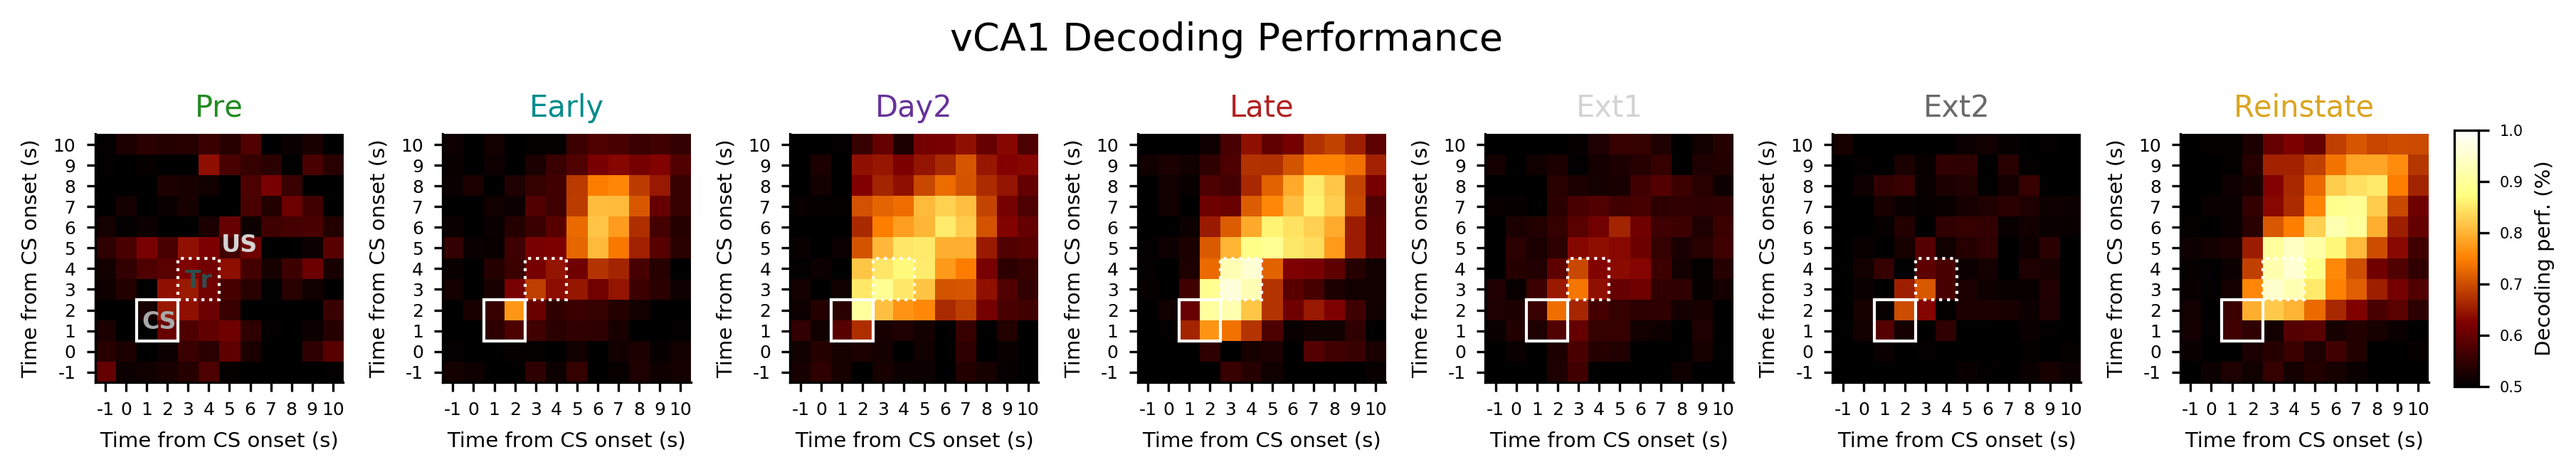

In [57]:
fig, ax = pl.subplots(1, 7, figsize=(11.5, 3))#, sharex=True, sharey=True)
vmin=0.5
vmax=1
for sess,x in zip(sessions,range(len(sessions))):
    im = ax[x].imshow(distinct[sess],origin='lower', interpolation='nearest', vmin=vmin, vmax=vmax,cmap='afmhot')
for x in range (0,7):
    ax[x].set_xticks(range(16))
    ax[x].set_yticks(range(16))
    ax[x].set_ylim(2.5, 14.5)
    ax[x].set_xlim(2.5,14.5)
    ax[x].set_xticklabels(['-5\nto\n-4','-4\nto\n-3','-2','-1','0','1','2','3','4','5', '6','7','8','9','10'],fontsize=6)
    ax[x].set_yticklabels(['-5\nto\n-4','-4\nto\n-3','-2','-1','0','1','2','3','4','5', '6','7','8','9','10'],fontsize=6)
    ax[x].set_ylabel('Time from CS onset (s)', fontsize=7)
    ax[x].set_xlabel('Time from CS onset (s)', fontsize=7)
    ax[x].set_title(session_labels[x],fontsize=10,color=dark_co[x])
    ax[x].tick_params(length=3)

import matplotlib.patches as patches
for x in range(7):
# Create a Rectangle patch
    CS = patches.Rectangle((4.5,4.5),2,2,linewidth=1,edgecolor='w',facecolor='none')
    Tr = patches.Rectangle((6.5,6.5),2,2,linewidth=1,edgecolor='w',facecolor='none',linestyle=':')
# Add the patch to the Axes
    ax[x].add_patch(CS)
    ax[x].add_patch(Tr)

ax[0].text(4.75,5.1,"CS",fontsize=8, weight='bold', color='darkgray')
ax[0].text(6.85,7.1,"Tr",fontsize=8, weight='bold', color='darkslategray')
ax[0].text(8.6,8.8,"US",fontsize=8, weight='bold', color='lightgray')

pl.suptitle('vCA1 Decoding Performance',y=.87,fontsize=13)

cax = fig.add_axes([1,0.3, 0.01, 0.4])
fig.colorbar(im, cax=cax, label='Decoding perf. (%)')
fig.tight_layout(pad=1.5)
fig.savefig('../img/%s_gmin_across_bins_distinct_horizontal.pdf'%NOTEBOOK_NAME)

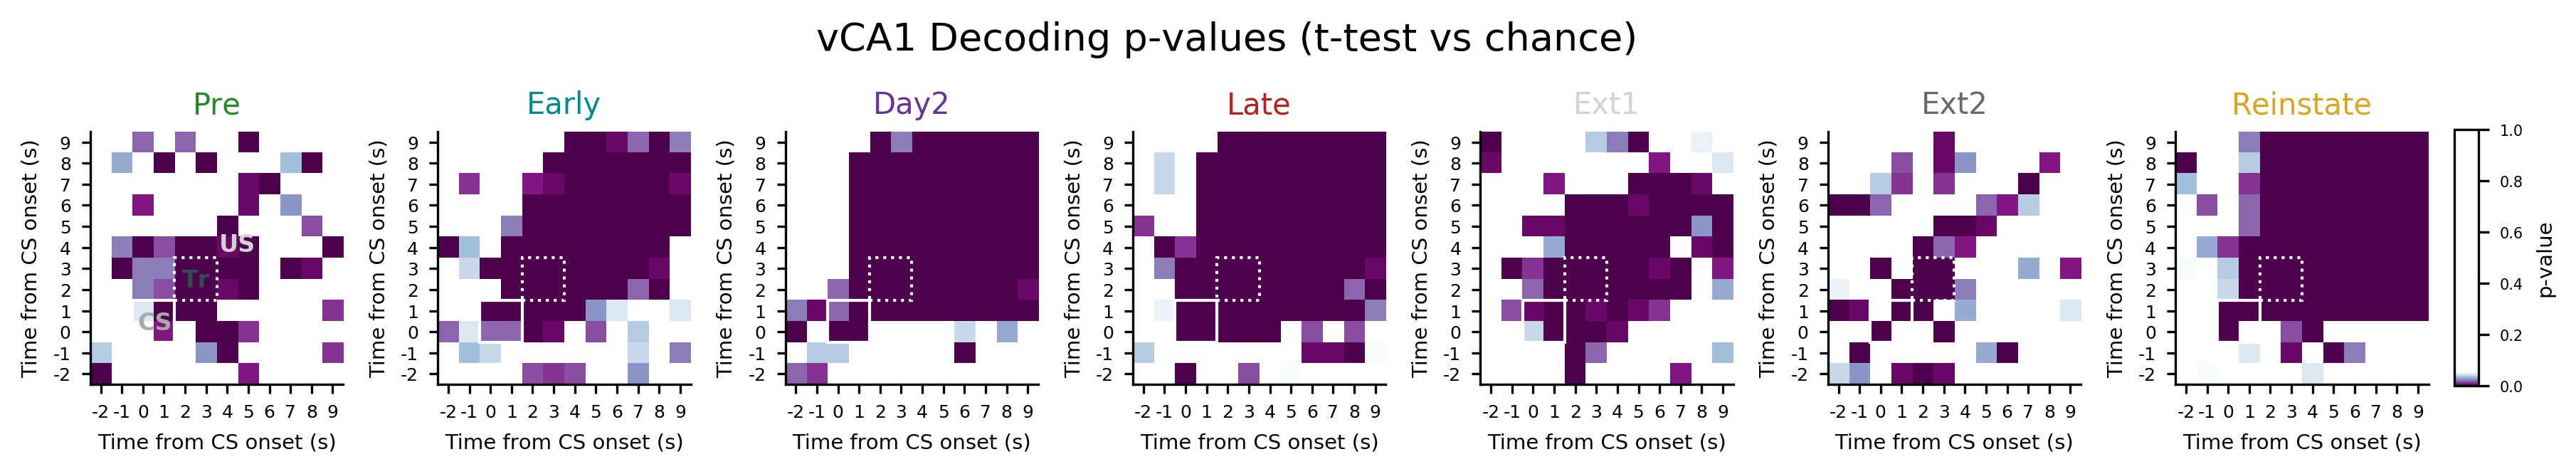

In [58]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
#make unique colormap for emphasizing significant p-values
sigs = cm.get_cmap('BuPu', 15)
white = np.array([1, 1, 1, 1])
black = np.array([0, 0, 0, 1])
newcolors = np.vstack((sigs(np.linspace(1, 0, 15)),
                       sigs(np.linspace(0, 1, 241))))
#pink = np.array([.96, .09, .6, 1])
newcolors[15:, :] = white
newcmap = ListedColormap(newcolors)

fig, ax = pl.subplots(1, 7, figsize=(11.5, 3))#, sharex=True, sharey=True)
vmin=0
vmax=1
for sess,x in zip(sessions,range(len(sessions))):
    im = ax[x].imshow(distinct_ttest[sess],origin='lower', interpolation='nearest', vmin=vmin, vmax=vmax,cmap=newcmap)
for x in range (0,7):
    ax[x].set_xticks(range(16))
    ax[x].set_yticks(range(16))
    ax[x].set_ylim(2.5, 14.5)
    ax[x].set_xlim(2.5,14.5)
    ax[x].set_xticklabels(['-5\nto\n-4','-4\nto\n-3','-3','-2','-1','0','1','2','3','4','5', '6','7','8','9','10'],fontsize=6)
    ax[x].set_yticklabels(['-5\nto\n-4','-4\nto\n-3','-3','-2','-1','0','1','2','3','4','5', '6','7','8','9','10'],fontsize=6)
    ax[x].set_ylabel('Time from CS onset (s)', fontsize=7)
    ax[x].set_xlabel('Time from CS onset (s)', fontsize=7)
    ax[x].set_title(session_labels[x],fontsize=10,color=dark_co[x])
    ax[x].tick_params(length=3)

import matplotlib.patches as patches
for x in range(7):
# Create a Rectangle patch
    CS = patches.Rectangle((4.5,4.5),2,2,linewidth=1,edgecolor='w',facecolor='none')
    Tr = patches.Rectangle((6.5,6.5),2,2,linewidth=1,edgecolor='w',facecolor='none',linestyle=':')
# Add the patch to the Axes
    ax[x].add_patch(CS)
    ax[x].add_patch(Tr)

ax[0].text(4.75,5.1,"CS",fontsize=8, weight='bold', color='darkgray')
ax[0].text(6.85,7.1,"Tr",fontsize=8, weight='bold', color='darkslategray')
ax[0].text(8.6,8.8,"US",fontsize=8, weight='bold', color='lightgray')

pl.suptitle('vCA1 Decoding p-values (t-test vs chance)',y=.87,fontsize=13)

cax = fig.add_axes([1,0.3, 0.01, 0.4])
fig.colorbar(im, cax=cax, label='p-value')
fig.tight_layout(pad=1.5)
fig.savefig('../img/%s_gmin_across_bins_distinct_horizontal_ttest.pdf'%NOTEBOOK_NAME)

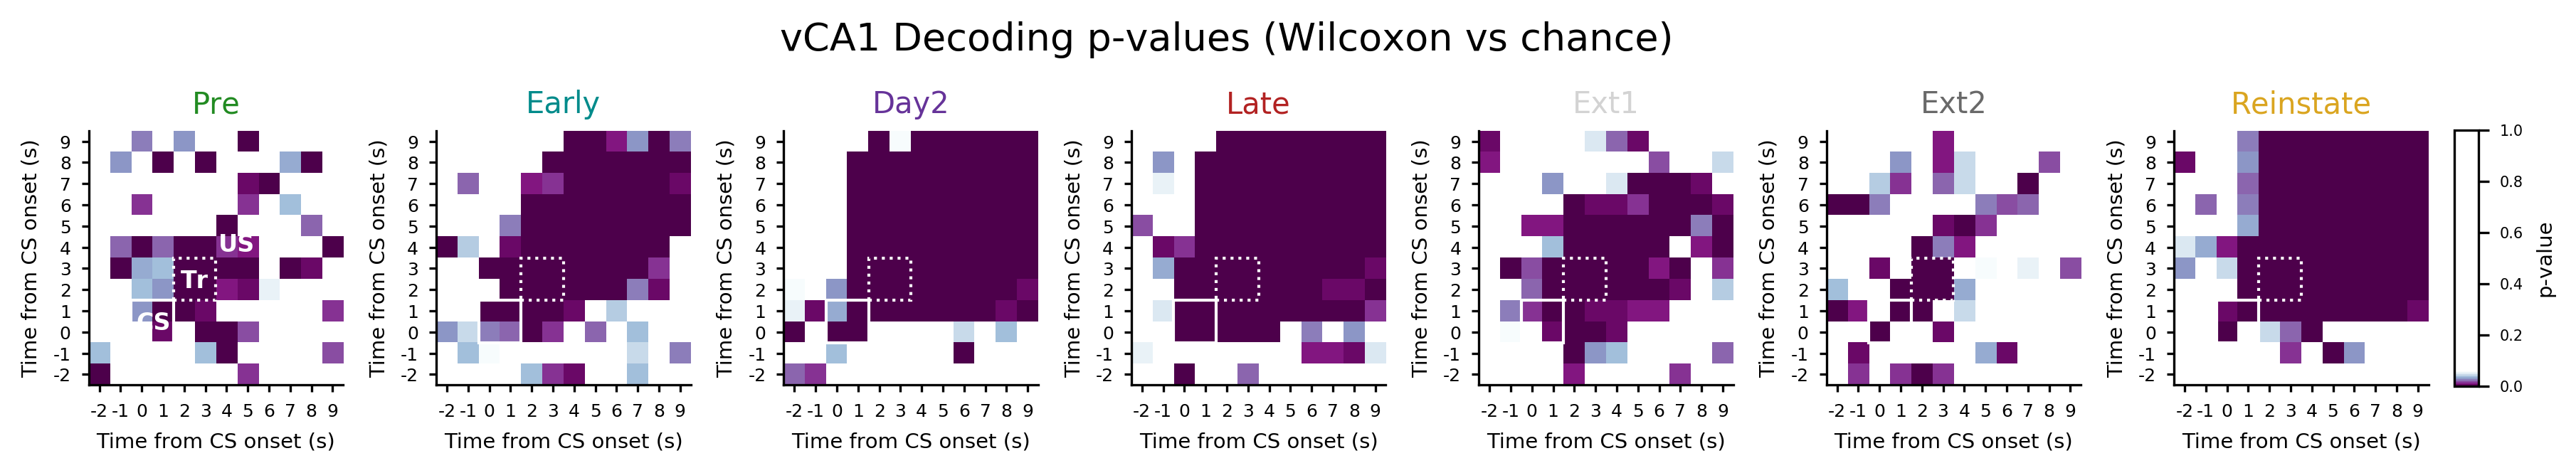

In [59]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
#make unique colormap for emphasizing significant p-values
sigs = cm.get_cmap('BuPu', 15)
white = np.array([1, 1, 1, 1])
newcolors = np.vstack((sigs(np.linspace(1, 0, 15)),
                       sigs(np.linspace(0, 1, 241))))
#pink = np.array([.96, .09, .6, 1])
newcolors[15:, :] = white
newcmap = ListedColormap(newcolors)

fig, ax = pl.subplots(1, 7, figsize=(11.5, 3))#, sharex=True, sharey=True)
vmin=0
vmax=1
for sess,x in zip(sessions,range(len(sessions))):
    im = ax[x].imshow(distinct_wilcox[sess],origin='lower', interpolation='nearest', vmin=vmin, vmax=vmax,cmap=newcmap)
for x in range (0,7):
    ax[x].set_xticks(range(16))
    ax[x].set_yticks(range(16))
    ax[x].set_ylim(2.5, 14.5)
    ax[x].set_xlim(2.5,14.5)
    ax[x].set_xticklabels(['-5\nto\n-4','-4\nto\n-3','-3','-2','-1','0','1','2','3','4','5', '6','7','8','9','10'],fontsize=6)
    ax[x].set_yticklabels(['-5\nto\n-4','-4\nto\n-3','-3','-2','-1','0','1','2','3','4','5', '6','7','8','9','10'],fontsize=6)
    ax[x].set_ylabel('Time from CS onset (s)', fontsize=7)
    ax[x].set_xlabel('Time from CS onset (s)', fontsize=7)
    ax[x].set_title(session_labels[x],fontsize=10,color=dark_co[x])
    ax[x].tick_params(length=2.5)

import matplotlib.patches as patches
for x in range(7):
# Create a Rectangle patch
    CS = patches.Rectangle((4.5,4.5),2,2,linewidth=1,edgecolor='w',facecolor='none')
    Tr = patches.Rectangle((6.5,6.5),2,2,linewidth=1,edgecolor='w',facecolor='none',linestyle=':')
# Add the patch to the Axes
    ax[x].add_patch(CS)
    ax[x].add_patch(Tr)

ax[0].text(4.75,5.1,"CS",fontsize=8, weight='bold', color='w')
ax[0].text(6.85,7.1,"Tr",fontsize=8, weight='bold', color='w')
ax[0].text(8.6,8.8,"US",fontsize=8, weight='bold', color='w')

pl.suptitle('vCA1 Decoding p-values (Wilcoxon vs chance)',y=.87,fontsize=13)

cax = fig.add_axes([1,0.3, 0.01, 0.4])
fig.colorbar(im, cax=cax, label='p-value')#,ticks=[0,.05,.1])
#cax.axes.set_ylim(0,.1)
fig.tight_layout(pad=1.5)
fig.savefig('../img/%s_gmin_across_bins_distinct_horizontal_wilcoxon.pdf'%NOTEBOOK_NAME)

### Take the mean of train/test, test/train

In [60]:
for t in range (16):
    exec('distinct_mean%s = {}'%t)
for sess in sessions:
    for t in range (16):
        exec("distinct_mean%s['%s'] = []"%(t,sess))
        for c in range (16):
            #print eval('testy%s'%t)[sess]
            eval('distinct_mean%s'%t)[sess].insert(c,(eval('scores_gmin_tb_distinct_%s_VS_%s'%(t,c))[sess].mean(1)).mean())

In [61]:
for t in range (16):
    exec('distinct_mean%s_ttest = {}'%t)
for sess in sessions:
    for t in range (16):
        exec("distinct_mean%s_ttest['%s'] = []"%(t,sess))
        for c in range (16):
            eval('distinct_mean%s_ttest'%t)[sess].insert(c,
                (sstats.ttest_1samp(eval('scores_gmin_tb_distinct_%s_VS_%s[sess].mean(1)[:15]'%(t,c)),.5)))
        for x,i in zip(eval('distinct_mean%s_ttest'%t)[sess],range(len(eval('distinct_mean%s_ttest'%t)[sess]))):
            exec("distinct_mean%s_ttest[sess][i] = x[-1]"%(t)) #only take p-values

In [62]:
for t in range (16):
    exec('distinct_mean%s_wilcox = {}'%t)
for sess in sessions:
    for t in range (16):
        exec("distinct_mean%s_wilcox['%s'] = []"%(t,sess))
        for c in range (16):
            exec("subtracted = [x-0.5 for x in scores_gmin_tb_distinct_%s_VS_%s[sess].mean(1)]"%(t,c))
            eval('distinct_mean%s_wilcox'%t)[sess].insert(c, sstats.wilcoxon(subtracted[:15]))
        for x,i in zip(eval('distinct_mean%s_wilcox'%t)[sess],range(len(eval('distinct_mean%s_wilcox'%t)[sess]))):
            exec("distinct_mean%s_wilcox[sess][i] = x[-1]"%(t)) #only take p-values

In [63]:
distinct_mean={}
for sess in sessions:
    distinct_mean[sess]=(distinct_mean0[sess], distinct_mean1[sess], distinct_mean2[sess], distinct_mean3[sess], distinct_mean4[sess], distinct_mean5[sess], distinct_mean6[sess], distinct_mean7[sess],
                 distinct_mean8[sess], distinct_mean9[sess], distinct_mean10[sess], distinct_mean11[sess], distinct_mean12[sess], distinct_mean13[sess], distinct_mean14[sess], distinct_mean15[sess])
    np.array([distinct_mean[sess]])

In [64]:
distinct_mean_ttest={}
for sess in sessions:
    distinct_mean_ttest[sess]=(distinct_mean0_ttest[sess], distinct_mean1_ttest[sess], distinct_mean2_ttest[sess], distinct_mean3_ttest[sess],
                          distinct_mean4_ttest[sess], distinct_mean5_ttest[sess], distinct_mean6_ttest[sess], distinct_mean7_ttest[sess],
                          distinct_mean8_ttest[sess], distinct_mean9_ttest[sess], distinct_mean10_ttest[sess], distinct_mean11_ttest[sess],
                          distinct_mean12_ttest[sess], distinct_mean13_ttest[sess], distinct_mean14_ttest[sess], distinct_mean15_ttest[sess])
    np.array([distinct_mean_ttest[sess]])

In [65]:
distinct_mean_wilcox={}
for sess in sessions:
    distinct_mean_wilcox[sess]=(distinct_mean0_wilcox[sess], distinct_mean1_wilcox[sess], distinct_mean2_wilcox[sess], distinct_mean3_wilcox[sess],
                          distinct_mean4_wilcox[sess], distinct_mean5_wilcox[sess], distinct_mean6_wilcox[sess], distinct_mean7_wilcox[sess],
                          distinct_mean8_wilcox[sess], distinct_mean9_wilcox[sess], distinct_mean10_wilcox[sess], distinct_mean11_wilcox[sess],
                          distinct_mean12_wilcox[sess], distinct_mean13_wilcox[sess], distinct_mean14_wilcox[sess], distinct_mean15_wilcox[sess])
    np.array([distinct_mean_wilcox[sess]])

fig, ax = pl.subplots(6, 1, figsize=(3, 15))#, sharex=True, sharey=True)
vmin=0.5
vmax=1
im = ax[0].imshow(distinct_mean['expo'],origin='lower', interpolation='nearest', vmin=vmin, vmax=vmax)
im = ax[1].imshow(distinct_mean['pre'],origin='lower', interpolation='nearest', vmin=vmin, vmax=vmax)
im = ax[2].imshow(distinct_mean['post'],origin='lower', interpolation='nearest', vmin=vmin, vmax=vmax)
im = ax[3].imshow(distinct_mean['ext1'],origin='lower', interpolation='nearest', vmin=vmin, vmax=vmax)
im = ax[4].imshow(distinct_mean['ext2'],origin='lower', interpolation='nearest', vmin=vmin, vmax=vmax)
im = ax[5].imshow(distinct_mean['renew'],origin='lower', interpolation='nearest', vmin=vmin, vmax=vmax)

for x in range (0,6):
    ax[x].set_xticks(range(16))
    ax[x].set_yticks(range(16))
    ax[x].set_ylim(2.5, 14.5)
    ax[x].set_xlim(2.5,14.5)
    ax[x].set_xticklabels(['-5\nto\n-4','-4\nto\n-3','-3','-2','-1','0\n(CS)','1\n(CS)','2\n(Tr)','3\n(Tr)','4\n(Rw)','5', '6','7','8','9','10'])
    ax[x].set_yticklabels(['-5\nto\n-4','-4\nto\n-3','-3','-2','-1','(CS) 0','(CS) 1','(Tr) 2','(Tr) 3','(Rw) 4','5', '6','7','8','9','10'])
    ax[x].set_ylabel('Time(s) from CS onset', fontsize=5)
    ax[x].set_xlabel('Time(s) from CS onset', fontsize=5)

# axs[0].set_xticklabels(np.arange(len(np.unique(labels)))+1)
# axs[0].set_yticklabels(np.arange(len(np.unique(labels)))+1)

ax[0].set_title('vHPC Decoding Across Time Bin\nExpo', fontsize=7, color='limegreen')
ax[1].set_title('Pre', fontsize=7, color='b')
ax[2].set_title('Post', fontsize=7, color='r')
ax[3].set_title('Ext1', fontsize=7, color='silver')
ax[4].set_title('Ext2', fontsize=7, color='grey')
ax[5].set_title('Reinstate', fontsize=7, color='y')

cax = fig.add_axes([.83, 0.854, 0.05, 0.117])
fig.colorbar(im, cax=cax)
fig.tight_layout(pad=2.5)
fig.savefig('../img/%s_gmin_across_bins_distinct_mean.jpg'%NOTEBOOK_NAME)

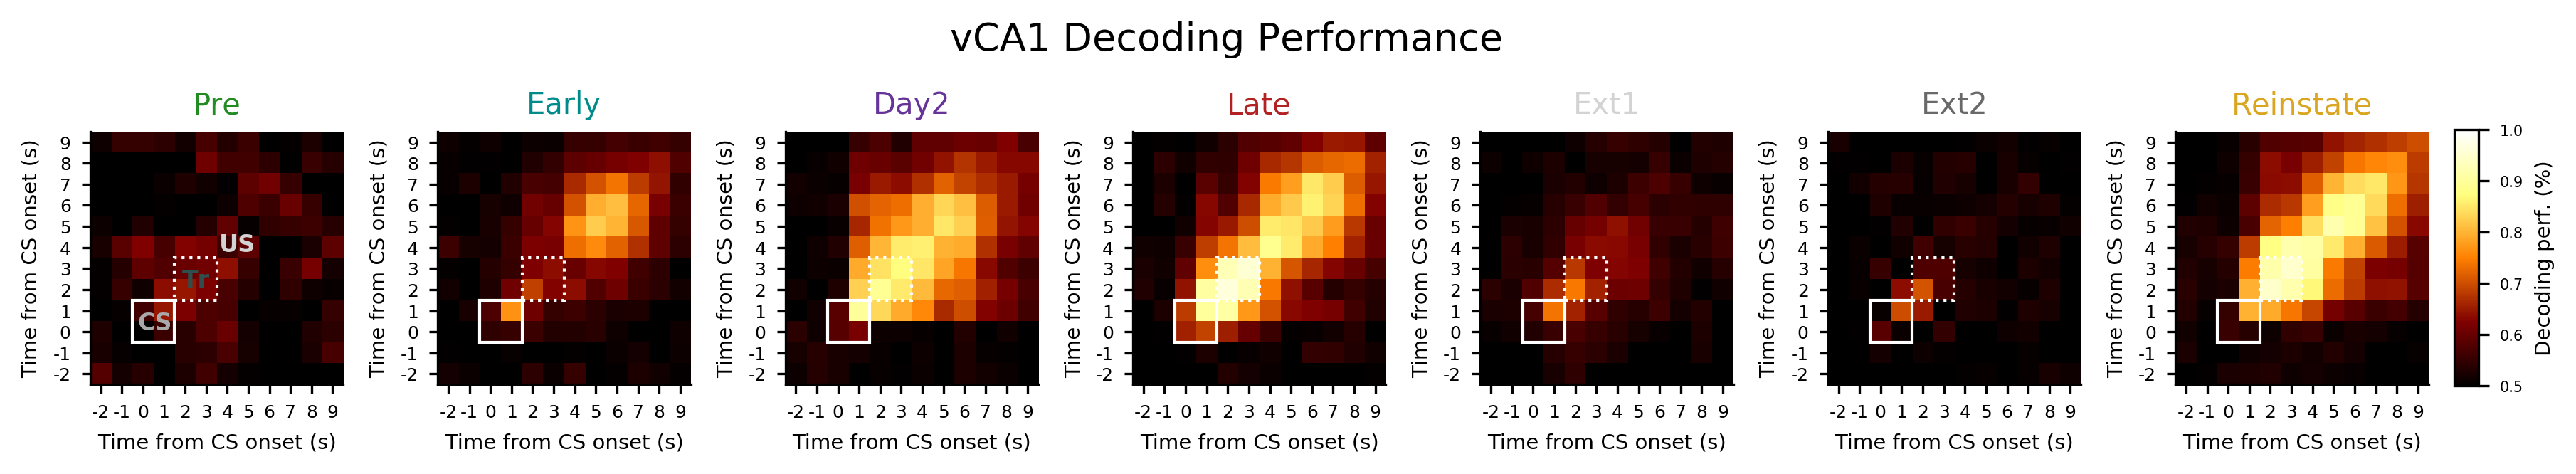

In [66]:
fig, ax = pl.subplots(1, 7, figsize=(11.5, 3))#, sharex=True, sharey=True)
vmin=0.5
vmax=1
for sess,x in zip(sessions,range(len(sessions))):
    im = ax[x].imshow(distinct_mean[sess],origin='lower', interpolation='nearest', vmin=vmin, vmax=vmax,cmap='afmhot')
for x in range (0,7):
    ax[x].set_xticks(range(16))
    ax[x].set_yticks(range(16))
    ax[x].set_ylim(2.5, 14.5)
    ax[x].set_xlim(2.5,14.5)
    ax[x].set_xticklabels(['-5\nto\n-4','-4\nto\n-3','-3','-2','-1','0','1','2','3','4','5', '6','7','8','9','10'],fontsize=6)
    ax[x].set_yticklabels(['-5\nto\n-4','-4\nto\n-3','-3','-2','-1','0','1','2','3','4','5', '6','7','8','9','10'],fontsize=6)
    ax[x].set_ylabel('Time from CS onset (s)', fontsize=7)
    ax[x].set_xlabel('Time from CS onset (s)', fontsize=7)
    ax[x].set_title(session_labels[x],fontsize=10,color=dark_co[x])
    ax[x].tick_params(length=3)

import matplotlib.patches as patches
for x in range(7):
# Create a Rectangle patch
    CS = patches.Rectangle((4.5,4.5),2,2,linewidth=1,edgecolor='w',facecolor='none')
    Tr = patches.Rectangle((6.5,6.5),2,2,linewidth=1,edgecolor='w',facecolor='none',linestyle=':')
# Add the patch to the Axes
    ax[x].add_patch(CS)
    ax[x].add_patch(Tr)

ax[0].text(4.75,5.1,"CS",fontsize=8, weight='bold', color='darkgray')
ax[0].text(6.85,7.1,"Tr",fontsize=8, weight='bold', color='darkslategray')
ax[0].text(8.6,8.8,"US",fontsize=8, weight='bold', color='lightgray')

pl.suptitle('vCA1 Decoding Performance',y=.87,fontsize=13)

cax = fig.add_axes([1,0.3, 0.01, 0.4])
fig.colorbar(im, cax=cax, label='Decoding perf. (%)')
fig.tight_layout(pad=1.5)
fig.savefig('../img/%s_gmin_across_bins_distinct_mean_horizontal.pdf'%NOTEBOOK_NAME)

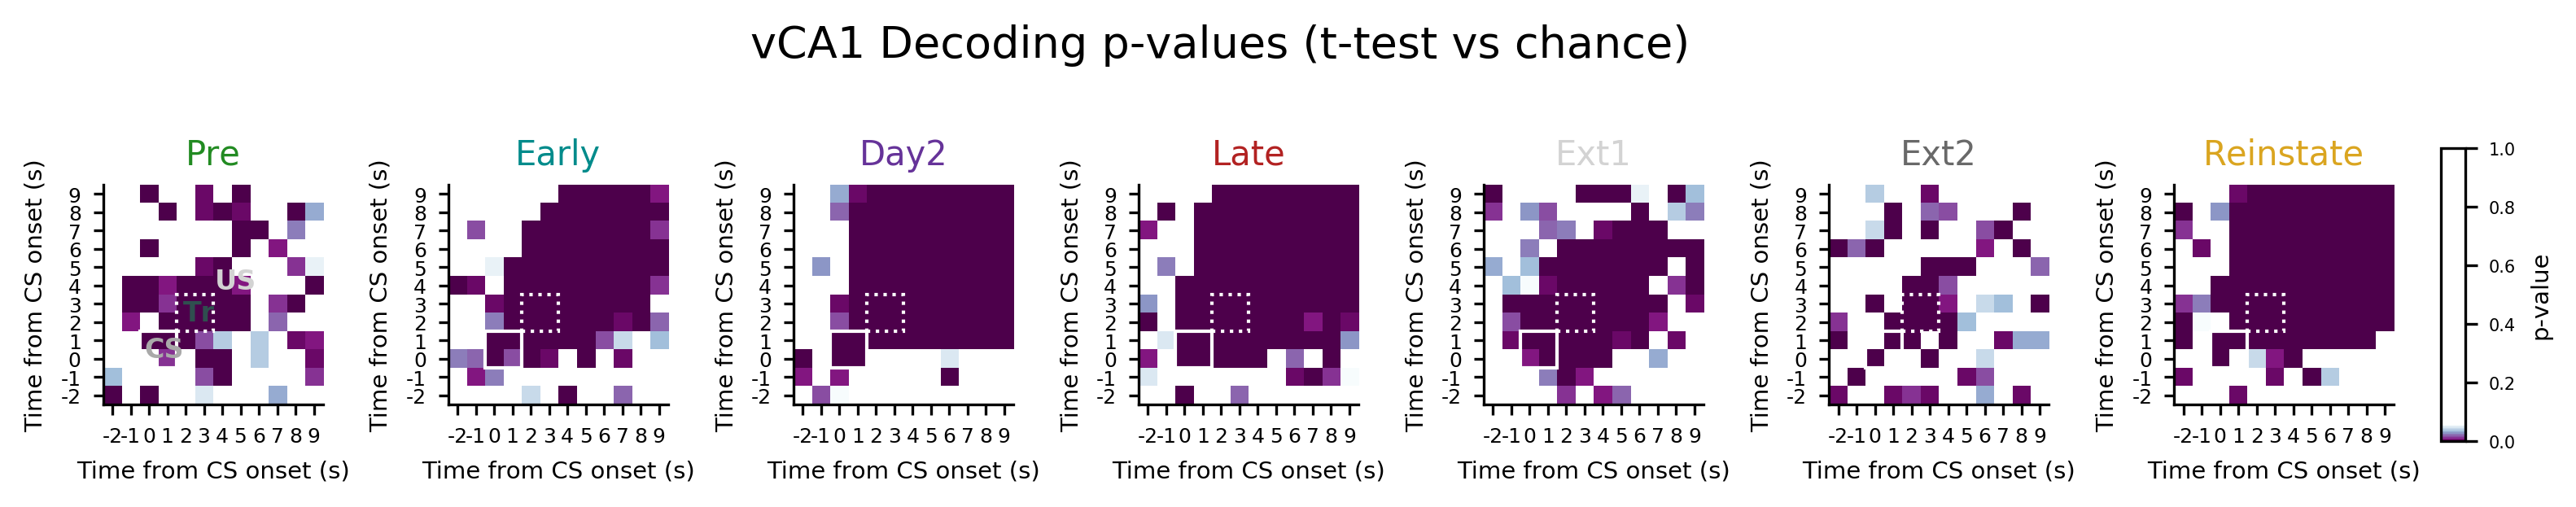

In [67]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
#make unique colormap for emphasizing significant p-values
sigs = cm.get_cmap('BuPu', 15)
white = np.array([1, 1, 1, 1])
black = np.array([0, 0, 0, 1])
newcolors = np.vstack((sigs(np.linspace(1, 0, 15)),
                       sigs(np.linspace(0, 1, 241))))
#pink = np.array([.96, .09, .6, 1])
newcolors[15:, :] = white
newcmap = ListedColormap(newcolors)

fig, ax = pl.subplots(1, 7, figsize=(10, 3))#, sharex=True, sharey=True)
vmin=0
vmax=1
for sess,x in zip(sessions,range(len(sessions))):
    im = ax[x].imshow(distinct_mean_ttest[sess],origin='lower', interpolation='nearest', vmin=vmin, vmax=vmax,cmap=newcmap)
for x in range (0,7):
    ax[x].set_xticks(range(16))
    ax[x].set_yticks(range(16))
    ax[x].set_ylim(2.5, 14.5)
    ax[x].set_xlim(2.5,14.5)
    ax[x].set_xticklabels(['-5\nto\n-4','-4\nto\n-3','-3','-2','-1','0','1','2','3','4','5', '6','7','8','9','10'],fontsize=6)
    ax[x].set_yticklabels(['-5\nto\n-4','-4\nto\n-3','-3','-2','-1','0','1','2','3','4','5', '6','7','8','9','10'],fontsize=6)
    ax[x].set_ylabel('Time from CS onset (s)', fontsize=7)
    ax[x].set_xlabel('Time from CS onset (s)', fontsize=7)
    ax[x].set_title(session_labels[x],fontsize=10,color=dark_co[x])
    ax[x].tick_params(length=3)

import matplotlib.patches as patches
for x in range(7):
# Create a Rectangle patch
    CS = patches.Rectangle((4.5,4.5),2,2,linewidth=1,edgecolor='w',facecolor='none')
    Tr = patches.Rectangle((6.5,6.5),2,2,linewidth=1,edgecolor='w',facecolor='none',linestyle=':')
# Add the patch to the Axes
    ax[x].add_patch(CS)
    ax[x].add_patch(Tr)

ax[0].text(4.75,5.1,"CS",fontsize=8, weight='bold', color='darkgray')
ax[0].text(6.85,7.1,"Tr",fontsize=8, weight='bold', color='darkslategray')
ax[0].text(8.6,8.8,"US",fontsize=8, weight='bold', color='lightgray')

pl.suptitle('vCA1 Decoding p-values (t-test vs chance)',y=.87,fontsize=13)

cax = fig.add_axes([1,0.3, 0.01, 0.4])
fig.colorbar(im, cax=cax, label='p-value')
fig.tight_layout(pad=1.5)
fig.savefig('../img/%s_gmin_across_bins_distinct_mean_horizontal_ttest.pdf'%NOTEBOOK_NAME)

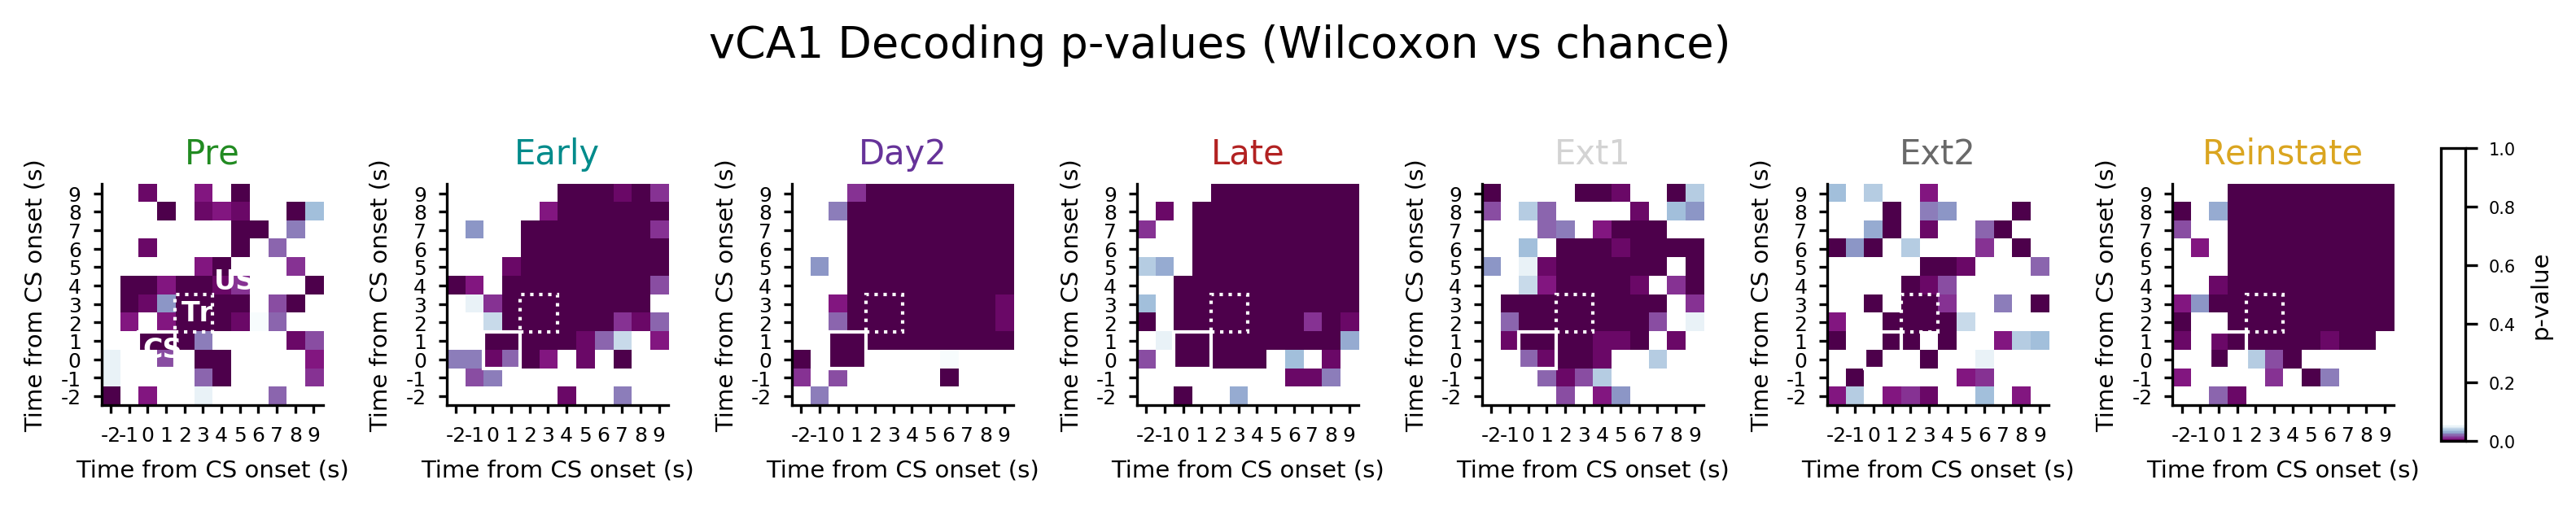

In [68]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
#make unique colormap for emphasizing significant p-values
sigs = cm.get_cmap('BuPu', 15)
white = np.array([1, 1, 1, 1])
newcolors = np.vstack((sigs(np.linspace(1, 0, 15)),
                       sigs(np.linspace(0, 1, 241))))
#pink = np.array([.96, .09, .6, 1])
newcolors[15:, :] = white
newcmap = ListedColormap(newcolors)

fig, ax = pl.subplots(1, 7, figsize=(10, 3))#, sharex=True, sharey=True)
vmin=0
vmax=1
for sess,x in zip(sessions,range(len(sessions))):
    im = ax[x].imshow(distinct_mean_wilcox[sess],origin='lower', interpolation='nearest', vmin=vmin, vmax=vmax,cmap=newcmap)
for x in range (0,7):
    ax[x].set_xticks(range(16))
    ax[x].set_yticks(range(16))
    ax[x].set_ylim(2.5, 14.5)
    ax[x].set_xlim(2.5,14.5)
    ax[x].set_xticklabels(['-5\nto\n-4','-4\nto\n-3','-3','-2','-1','0','1','2','3','4','5', '6','7','8','9','10'],fontsize=6)
    ax[x].set_yticklabels(['-5\nto\n-4','-4\nto\n-3','-3','-2','-1','0','1','2','3','4','5', '6','7','8','9','10'],fontsize=6)
    ax[x].set_ylabel('Time from CS onset (s)', fontsize=7)
    ax[x].set_xlabel('Time from CS onset (s)', fontsize=7)
    ax[x].set_title(session_labels[x],fontsize=10,color=dark_co[x])
    ax[x].tick_params(length=2.5)

import matplotlib.patches as patches
for x in range(7):
# Create a Rectangle patch
    CS = patches.Rectangle((4.5,4.5),2,2,linewidth=1,edgecolor='w',facecolor='none')
    Tr = patches.Rectangle((6.5,6.5),2,2,linewidth=1,edgecolor='w',facecolor='none',linestyle=':')
# Add the patch to the Axes
    ax[x].add_patch(CS)
    ax[x].add_patch(Tr)

ax[0].text(4.75,5.1,"CS",fontsize=8, weight='bold', color='w')
ax[0].text(6.85,7.1,"Tr",fontsize=8, weight='bold', color='w')
ax[0].text(8.6,8.8,"US",fontsize=8, weight='bold', color='w')

pl.suptitle('vCA1 Decoding p-values (Wilcoxon vs chance)',y=.87,fontsize=13)

cax = fig.add_axes([1,0.3, 0.01, 0.4])
fig.colorbar(im, cax=cax, label='p-value')#,ticks=[0,.05,.1])
#cax.axes.set_ylim(0,.1)
fig.tight_layout(pad=1.5)
fig.savefig('../img/%s_gmin_across_bins_distinct_mean_horizontal_wilcoxon.pdf'%NOTEBOOK_NAME)

### split CS+ or CS- trials in half, relabel and try to decode from one another

In [69]:
#trying to use different trials for different time bins
import copy
from sklearn.svm import SVC
decoder = SVC(kernel='linear', decision_function_shape='ovo')

def combine_train_test_patterns_across_tbs(patterns_train, patterns_test, labels, train_test_split=0.5, classes=None, n_cells=None,
                                relabel=None, relabel_test=None):
    
    if classes is None:
        classes = [2,3,4,5]
    # randomly split up each trial type into halves and relabel
    relabeled = copy.deepcopy(labels)
    for ani in patterns_train.keys():
        which_relabel_a = np.random.permutation(np.where(relabeled[ani]==0)[0])
        which_relabel_b = which_relabel_a[:len(which_relabel_a)/2]
        which_relabel_a = which_relabel_a[len(which_relabel_a)/2:]
        which_relabel_c = np.random.permutation(np.where(relabeled[ani]==1)[0])
        which_relabel_d = which_relabel_c[:len(which_relabel_c)/2]
        which_relabel_c = which_relabel_c[len(which_relabel_c)/2:]      
        for x in which_relabel_a:
            relabeled[ani][x] = 2
        for x in which_relabel_b:
            relabeled[ani][x] = 3
        for x in which_relabel_c:
            relabeled[ani][x] = 4
        for x in which_relabel_d:
            relabeled[ani][x] = 5
    
    which_train = {}
    which_test = {}
    for ani in patterns_train.keys():
        which_trains = []
        which_tests = []
        for l in classes:
            if l>=0:
                wt = np.random.permutation(np.where(relabeled[ani]==l)[0])
                if train_test_split<1:
                    wT = wt[:int(len(wt)*train_test_split)]
                    which_trains.append(wt[int(len(wt)*train_test_split):])
                    which_tests.append(wT)
                else:
                    which_trains.append(wt)
        which_train[ani] = np.concatenate(which_trains)
        if train_test_split<1:
            which_test[ani] = np.concatenate(which_tests)
    
    patterns_t = patterns_train.copy()
    labels_t = copy.deepcopy(relabeled)
    for ani in patterns_train.keys():
        patterns_t[ani] = patterns_train[ani][which_train[ani]]
        labels_t[ani] = relabeled[ani][which_train[ani]]
    patterns_comb_train, labels_comb_ = ut.combine_patterns(patterns_t, labels_t, classes=classes)
        
    if train_test_split<1:
        patterns_T = patterns_test.copy()
        labels_T = copy.deepcopy(relabeled)
        for ani in patterns_test.keys():
            patterns_T[ani] = patterns_test[ani][which_test[ani]]
            labels_T[ani] = relabeled[ani][which_test[ani]]
        patterns_comb_test, labels_comb_test_ = ut.combine_patterns(patterns_T, labels_T, classes=classes)
    else:
        patterns_comb_test = None
    
    if relabel is not None:
        labels_comb = np.r_[[relabel[l] for l in labels_comb_]]
    else:
        labels_comb = labels_comb_
    
    if train_test_split<1:
        if relabel_test is not None:
            labels_comb_test = np.r_[[relabel_test[l] for l in labels_comb_test_]]
        else:
            if relabel is not None:
                labels_comb_test = np.r_[[relabel[l] for l in labels_comb_test_]]
            else:
                labels_comb_test = labels_comb_test_
    elif train_test_split == 1:
        labels_comb_test = None
    
    
    if n_cells is None:
        which_cells = [True]*patterns_comb_train.shape[1]
    else:
        which_cells = np.random.permutation(range(patterns_comb_train.shape[1]))[:n_cells]
     
    patterns_comb_train = patterns_comb_train[:, which_cells]
    patterns_comb_test = patterns_comb_test[:, which_cells] if train_test_split<1 else patterns_comb_test
    
    if train_test_split<1:
        return (patterns_comb_train[labels_comb>=0], labels_comb[labels_comb>=0],
                patterns_comb_test[labels_comb_test>=0], labels_comb_test[labels_comb_test>=0])
    if train_test_split == 1:
        return (patterns_comb_train[labels_comb>=0], labels_comb[labels_comb>=0],
                None,None)

def do_test_across_tbs(patterns_train, patterns_test, labels, **args):
    x, y, xT, yT = combine_train_test_patterns_across_tbs(patterns_train, patterns_test, labels, train_test_split=0.5, **args)
    decoder.fit(x, y)
    return decoder.score(xT, yT)    
#    decoder.fit(x,y)
#    scores = decoder.score(xT, yT)
#    decoder.fit(xT, yT)
#    return np.append(scores, decoder.score(x,y))

In [70]:
comparisons = ['CSPvsCSP', 'CSMvsCSM']
relabels = [{2:0 ,3:1, 4:-1, 5:-1},{2:-1 ,3:-1, 4:0, 5:1}]

In [71]:
#%%time
#n_loops=15
#for t in range (16):
#    for c in range (16):
#        for comp,relab in zip(comparisons,relabels):
#            exec('scores_tb_%s_VS_%s_%s = {}'%(t,c,comp))
#            for sess in sessions:
#                print sess,t,c,comp,
#                print " ",
#                eval('scores_tb_%s_VS_%s_%s'%(t,c,comp))[sess] = np.r_[[do_test_across_tbs(eval('patterns_tb_%s_%s'%(t,sess)),
#                      eval('patterns_tb_%s_%s'%(c,sess)),eval('labels_%s'%sess),classes=range(2,6),
#                      n_cells=None, relabel=relab) for i in range(n_loops)]]

In [72]:
comparisons_av = ['CSPvsCSP','CSMvsCSM']
comp_labels_av = ['CS+ vs CS+','CS-  vs CS-']

In [73]:
for t in range (16):
    for comp in comparisons_av:
        exec('distinct%s_%s = {}'%(t,comp))
for sess in sessions:
    for t in range (16):
        for comp in comparisons_av:
            exec("distinct%s_%s['%s'] = []"%(t,comp,sess))
            for c in range (14):
                eval('distinct%s_%s'%(t,comp))[sess].insert(c,(eval('scores_tb_%s_VS_%s_%s'%(t,c,comp))[sess].mean()))

NameError: name 'scores_tb_0_VS_0_CSPvsCSP' is not defined

In [ ]:
for comp in comparisons_av:
    exec("distinct_%s={}"%comp)
    for sess in sessions:
        exec("distinct_%s[sess]=(distinct0_%s[sess], distinct1_%s[sess], distinct2_%s[sess], distinct3_%s[sess], distinct4_%s[sess], distinct5_%s[sess], distinct6_%s[sess], distinct7_%s[sess],\
              distinct8_%s[sess], distinct9_%s[sess], distinct10_%s[sess], distinct11_%s[sess], distinct12_%s[sess],\
              distinct13_%s[sess],distinct14_%s[sess],distinct15_%s[sess])"%(comp,comp,comp,comp,comp,comp,comp,comp,comp,comp,comp,comp,comp,comp,comp,comp,comp))
        np.array([eval("distinct_%s[sess]"%comp)])

In [ ]:
fig, ax = pl.subplots(2, 6, figsize=(11, 5))#, sharex=True, sharey=True)
vmin=0
vmax=1
for sess,x in zip(sessions,range(len(sessions))):
    for comp,i in zip(comparisons_av,range(len(comparisons_av))):
        im = ax[i][x].imshow(eval("distinct_%s[sess]"%comp),origin='lower', interpolation='nearest', vmin=vmin, vmax=vmax,cmap='RdBu')
        ax[i][x].set_xticks(range(14))
        ax[i][x].set_yticks(range(14))
        ax[i][x].set_ylim(2.5,13.5)
        ax[i][x].set_xlim(2.5,13.5)
        ax[i][x].set_xticklabels(['-5\nto\n-4','-4\nto\n-3','-3','-2','-1','0','1','2','3','4','5', '6','7','8','9','10'],fontsize=6)
        ax[i][x].set_yticklabels(['-5\nto\n-4','-4\nto\n-3','-3','-2','-1','0','1','2','3','4','5', '6','7','8','9','10'],fontsize=6)
        ax[i][x].set_ylabel('Time from CS onset (s)', fontsize=7)
        ax[i][x].set_xlabel('Time from CS onset (s)', fontsize=7)
        ax[i][x].set_title(session_labels[x],fontsize=10,color=dark_co[x])
        ax[i][x].tick_params(length=3)
        ax[i][2].text(10.5,16,comp_labels_av[i],fontsize=11)

import matplotlib.patches as patches
for i in range(2):
# Create a Rectangle patch
    CS = patches.Rectangle((4.5,4.5),2,2,linewidth=1,edgecolor='k',facecolor='none')
    Tr = patches.Rectangle((6.5,6.5),2,2,linewidth=1,edgecolor='k',facecolor='none',linestyle=':')
# Add the patch to the Axes
    ax[i][0].add_patch(CS)
    ax[i][0].add_patch(Tr)
    ax[i][0].text(4.85,5.2,"CS",fontsize=8, weight='bold', color='k')
    ax[i][0].text(6.85,7.15,"Tr",fontsize=8, weight='bold', color='k')
    ax[i][0].text(8.6,8.8,"US",fontsize=8, weight='bold', color='k')

pl.suptitle('vCA1 Decoding Performance',y=1.05,fontsize=15)

cax = fig.add_axes([1,0.3, 0.01, 0.4])
fig.colorbar(im, cax=cax, label='Decoding perf. (%)')
fig.tight_layout(pad=1)
#fig.savefig('../img/%s_gmin_across_bins_distinct_horizontal.pdf'%NOTEBOOK_NAME)

In [ ]:
#%%time
#tt_relabels = [{2:0,3:-1,4:1,5:-1}, {2:0,3:-1,4:-1,5:1}, {2:-1,3:0,4:1,5:-1}, {2:-1,3:0,4:-1,5:1}]
#tt_relabels_test = [{2:-1,3:0,4:-1,5:1}, {2:-1,3:0,4:1,5:-1}, {2:0,3:-1,4:-1,5:1}, {2:0,3:-1,4:1,5:-1}]
#tt_pairs = ['tr13_ts24','tr14_ts23','tr23_ts14','tr24_ts13']
#n_loops=15
#for t in range (16):
#    for c in range (16):
#        for re, rete, it in zip(tt_relabels,tt_relabels_test,tt_pairs):
#            exec('scores_tb_%s_VS_%s_outcome_%s = {}'%(t,c,it))
#            for sess in sessions:
#                print sess,t,c,it,
#                print " ",
#                eval('scores_tb_%s_VS_%s_outcome_%s'%(t,c,it))[sess] = np.r_[[do_test_across_tbs(eval('patterns_tb_%s_%s'%(t,sess)),
#                      eval('patterns_tb_%s_%s'%(c,sess)),eval('labels_%s'%sess),classes=range(2,6),
#                      n_cells=None, relabel=re, relabel_test=rete) for i in range(n_loops)]]

In [ ]:
#for outcome endoding, average each idividual comparison
for t in range(16):
    for c in range(16):
        exec("scores_tb_%s_VS_%s_outcome_averaged = {}"%(t,c))
        for sess in sessions:
            exec("scores_tb_%s_VS_%s_outcome_averaged[sess] = np.mean((scores_tb_%s_VS_%s_outcome_tr13_ts24[sess],\
                 scores_tb_%s_VS_%s_outcome_tr14_ts23[sess],scores_tb_%s_VS_%s_outcome_tr23_ts14[sess],\
                 scores_tb_%s_VS_%s_outcome_tr24_ts13[sess]),axis=0)"%(t,c,t,c,t,c,t,c,t,c))

In [ ]:
tt_pairs_avg = ['tr13_ts24','tr14_ts23','tr23_ts14','tr24_ts13','averaged']
tt_labels = ['1v3 & 2v4','1v4 & 2v3','2v3 & 1v4','2v4 & 1v3','Average']

In [ ]:
for t in range (16):
    for comp in tt_pairs_avg:
        exec('distinct%s_%s = {}'%(t,comp))
for sess in sessions:
    for t in range (16):
        for comp in tt_pairs_avg:
            exec("distinct%s_%s['%s'] = []"%(t,comp,sess))
            for c in range (16):
                eval('distinct%s_%s'%(t,comp))[sess].insert(c,(eval('scores_tb_%s_VS_%s_outcome_%s'%(t,c,comp))[sess].mean()))

In [ ]:
for comp in tt_pairs_avg:
    exec("distinct_%s={}"%comp)
    for sess in sessions:
        exec("distinct_%s[sess]=(distinct0_%s[sess], distinct1_%s[sess], distinct2_%s[sess], distinct3_%s[sess], distinct4_%s[sess], distinct5_%s[sess], distinct6_%s[sess], distinct7_%s[sess],\
              distinct8_%s[sess], distinct9_%s[sess], distinct10_%s[sess], distinct11_%s[sess], distinct12_%s[sess],\
              distinct13_%s[sess],distinct14_%s[sess],distinct15_%s[sess])"%(comp,comp,comp,comp,comp,comp,comp,comp,comp,comp,comp,comp,comp,comp,comp,comp,comp))
        np.array([eval("distinct_%s[sess]"%comp)])

In [ ]:
fig, ax = pl.subplots(5, 6, figsize=(11, 11))#, sharex=True, sharey=True)
vmin=0.5
vmax=1
for sess,x in zip(sessions,range(len(sessions))):
    for comp,i in zip(tt_pairs_avg,range(len(tt_pairs_avg))):
        im = ax[i][x].imshow(eval("distinct_%s[sess]"%comp),origin='lower', interpolation='nearest', vmin=vmin, vmax=vmax,cmap='afmhot')
        ax[i][x].set_xticks(range(16))
        ax[i][x].set_yticks(range(16))
        ax[i][x].set_ylim(2.5,15.5)
        ax[i][x].set_xlim(2.5,15.5)
        ax[i][x].set_xticklabels(['-5\nto\n-4','-4\nto\n-3','-3','-2','-1','0','1','2','3','4','5', '6','7','8','9','10'],fontsize=6)
        ax[i][x].set_yticklabels(['-5\nto\n-4','-4\nto\n-3','-3','-2','-1','0','1','2','3','4','5', '6','7','8','9','10'],fontsize=6)
        ax[i][x].set_ylabel('Time from CS onset (s)', fontsize=7)
        ax[i][x].set_xlabel('Time from CS onset (s)', fontsize=7)
        ax[i][x].set_title(session_labels[x],fontsize=10,color=dark_co[x])
        ax[i][x].tick_params(length=3)
        ax[i][2].text(12,15,tt_labels[i],fontsize=11)

import matplotlib.patches as patches
for i in range(5):
# Create a Rectangle patch
    CS = patches.Rectangle((4.5,4.5),2,2,linewidth=1,edgecolor='k',facecolor='none')
    Tr = patches.Rectangle((6.5,6.5),2,2,linewidth=1,edgecolor='k',facecolor='none',linestyle=':')
# Add the patch to the Axes
    ax[i][0].add_patch(CS)
    ax[i][0].add_patch(Tr)
    ax[i][0].text(4.85,5.2,"CS",fontsize=8, weight='bold', color='k')
    ax[i][0].text(6.85,7.15,"Tr",fontsize=8, weight='bold', color='k')
    ax[i][0].text(8.6,8.8,"US",fontsize=8, weight='bold', color='k')

pl.suptitle('vCA1 Decoding Performance',y=1.05,fontsize=15)

cax = fig.add_axes([1,0.3, 0.01, 0.4])
fig.colorbar(im, cax=cax, label='Decoding perf. (%)')
fig.tight_layout(pad=1)
#fig.savefig('../img/%s_gmin_across_bins_distinct_horizontal.pdf'%NOTEBOOK_NAME)

#### try to decode CS+ odor period from CS+ trace period to show distinct signals during this time

In [ ]:
#trying to decode odor period vs trace period for a specific trial type
from sklearn.svm import SVC
decoder = SVC(kernel='linear', decision_function_shape='ovo')

def do_test_CSvsTR_distinct(patterns_t, labels_t, patterns_T, labels_T, relabel = {1:0}, n_cells=None):
    which_train = {}
    which_test = {}
    for ani in patterns_t.keys():
        which_train_a = np.random.permutation(np.where(labels_t[ani]==0)[0])
        which_test_a = which_train_a[:len(which_train_a)/2]
        which_train_a = which_train_a[len(which_train_a)/2:]
        
        #which_train_b = np.random.permutation(np.where(labels_t[ani]==1)[0])
        #which_test_b = which_train_b[:len(which_train_b)/2]
        #which_train_b = which_train_b[len(which_train_b)/2:]
        
        which_train[ani] = np.concatenate((which_train_a))
        which_test[ani] = np.concatenate((which_test_a))
    patterns_dt = patterns_t.copy()
    labels_dt = labels_t.copy()
    patterns_dT = patterns_T.copy()
    labels_dT = labels_T.copy()
    for ani in patterns_t.keys():
        patterns_dt[ani] = patterns_dt[ani][which_train[ani]]
        labels_dt[ani] = labels_dt[ani][which_train[ani]]
        patterns_dT[ani] = patterns_dT[ani][which_test[ani]]
        labels_dT[ani] = labels_dT[ani][which_test[ani]]      
        
    patterns_comb_train, labels_comb = ut.combine_patterns(patterns_dt, labels_dt)
    patterns_comb_test, labels_comb = ut.combine_patterns(patterns_dT, labels_dT)
    
    #here is the part that is important
    labels_comb1 = np.r_[[relabel[l] for l in labels_comb]]
    
    if n_cells is None:
        cells = list(range(patterns_comb_train.shape[1]))
    else:
        cells = np.random.choice(range(patterns_comb_train.shape[1]), size=n_cells, replace=False)
    
    decoder.fit(patterns_comb_train[:, cells], labels_comb)
    scores = decoder.score(patterns_comb_test[:, cells], labels_comb)
    decoder.fit(patterns_comb_test[:, cells], labels_comb)
    return np.append(scores, decoder.score(patterns_comb_train[:, cells], labels_comb))

In [88]:
save_workspace(db)

Could not store variable 'patches'. Skipping...
Could not store variable 'copy'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'sstats'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'cm'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'np'. Skipping...
